In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/day_approach_maskedID_timeseries.csv')
df.columns=['_'.join(x.lower().split()) for x in df.columns]
df.columns=[df.columns[i]+'.0' if i<=9 else df.columns[i] for i in range(len(df.columns)) ]
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nr._sessions.0               42766 non-null  float64
 1   total_km.0                   42766 non-null  float64
 2   km_z3-4.0                    42766 non-null  float64
 3   km_z5-t1-t2.0                42766 non-null  float64
 4   km_sprinting.0               42766 non-null  float64
 5   strength_training.0          42766 non-null  float64
 6   hours_alternative.0          42766 non-null  float64
 7   perceived_exertion.0         42766 non-null  float64
 8   perceived_trainingsuccess.0  42766 non-null  float64
 9   perceived_recovery.0         42766 non-null  float64
 10  nr._sessions.1               42766 non-null  float64
 11  total_km.1                   42766 non-null  float64
 12  km_z3-4.1                    42766 non-null  float64
 13  km_z5-t1-t2.1   

In [3]:
df.columns

Index(['nr._sessions.0', 'total_km.0', 'km_z3-4.0', 'km_z5-t1-t2.0',
       'km_sprinting.0', 'strength_training.0', 'hours_alternative.0',
       'perceived_exertion.0', 'perceived_trainingsuccess.0',
       'perceived_recovery.0', 'nr._sessions.1', 'total_km.1', 'km_z3-4.1',
       'km_z5-t1-t2.1', 'km_sprinting.1', 'strength_training.1',
       'hours_alternative.1', 'perceived_exertion.1',
       'perceived_trainingsuccess.1', 'perceived_recovery.1', 'nr._sessions.2',
       'total_km.2', 'km_z3-4.2', 'km_z5-t1-t2.2', 'km_sprinting.2',
       'strength_training.2', 'hours_alternative.2', 'perceived_exertion.2',
       'perceived_trainingsuccess.2', 'perceived_recovery.2', 'nr._sessions.3',
       'total_km.3', 'km_z3-4.3', 'km_z5-t1-t2.3', 'km_sprinting.3',
       'strength_training.3', 'hours_alternative.3', 'perceived_exertion.3',
       'perceived_trainingsuccess.3', 'perceived_recovery.3', 'nr._sessions.4',
       'total_km.4', 'km_z3-4.4', 'km_z5-t1-t2.4', 'km_sprinting.4',
  

In [4]:
features=['nr._sessions', 'total_km', 'km_z3-4', 'km_z5-t1-t2',
       'km_sprinting', 'strength_training', 'hours_alternative',
       'perceived_exertion', 'perceived_trainingsuccess',
       'perceived_recovery']

nr. sessions (number of trainings completed)

total km (number of kilometers covered by running)

km Z3-4 (number of kilometers covered in intensity zones three and four,

	running on or slightly above the anaerobic threshold)

km Z5-T1-T2 (number of kilometers covered in intensity zone five, close to 
	     
	     maximum heart rate, or intensive track intervals 

	     (T1 for longer repetitions and T2 for shorter)

km sprinting (number of kilometers covered with sprints)

strength training (whether the day included a strength training)

hours alternative (number of hours spent on cross training)

perceived exertion (athlete's own estimation of how tired they were after 

		   completing the main session of the day. In case of of a 

		   rest day, this value will be -0.01)

perceived trainingSuccess (athlete's own estimation of how well the session went.

			   In case of of a rest day, this value will be -0.01)

perceived recovery (athlete's own estimation of how well rested they felt before

	 	    the start of the session. In case of of a 

		   rest day, this value will be -0.01)


Note: Z1–Z5 represent different heart-rate zones where Z1 is easy aerobic effort and Z5 is close to maximum heart rate. 

T1 and T2 are long and short track intervals, which are typically done at high intensity.

In [5]:
df['athlete_id'].nunique()

74

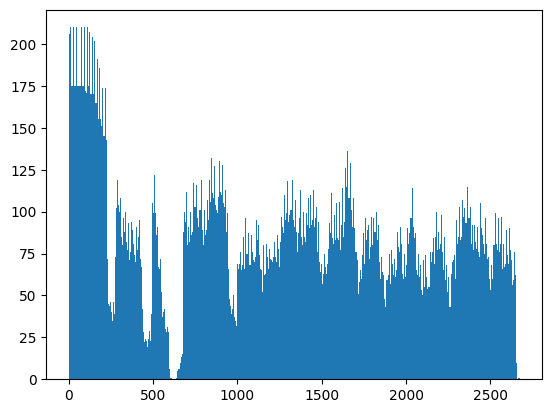

In [6]:
#df['date'].value_counts()
plt.hist(df['date'], bins=500)
plt.show()

In [7]:
df['injury'].value_counts() / len(df) * 100

injury
0    98.636768
1     1.363232
Name: count, dtype: float64


for i in range(7):
    df['rest_day.'+str(i)] = df['perceived_recovery.'+str(i)].map(lambda x : 1 if x == -0.01 else 0)
    
features.append('rest_day')

In [8]:
features

['nr._sessions',
 'total_km',
 'km_z3-4',
 'km_z5-t1-t2',
 'km_sprinting',
 'strength_training',
 'hours_alternative',
 'perceived_exertion',
 'perceived_trainingsuccess',
 'perceived_recovery']

In [9]:
for i in range(7):
    df['medium_zone_pct'+"."+str(i)] = df['km_z3-4'+"."+str(i)]/ (df['total_km'+"."+str(i)] + 1e-6) * 100
    df['high_zone_pct'+"."+str(i)] = df['km_z5-t1-t2'+"."+str(i)]/ (df['total_km'+"."+str(i)] + 1e-6) * 100
    df['sprint_pct'+"."+str(i)] = df['km_sprinting'+"."+str(i)]/ (df['total_km'+"."+str(i)] + 1e-6) * 100

In [10]:
features.append('medium_zone_pct')
features.append('high_zone_pct')
features.append('sprint_pct')

In [11]:
df['num_sessions'] = 0
for i in range(7):
    df['num_sessions'] += df["nr._sessions."+str(i)]
df['num_sessions_avg'] = df['num_sessions']/7


df['num_train_days'] = 0
for i in range(7):
    df['num_train_days'] += df["nr._sessions."+str(i)].map(lambda x : 1 if x>0 else 0)
    
    
df['num_rest_days'] = 7- df['num_train_days']


df['train_days_pct']= df['num_train_days']/7 * 100
df['rest_days_pct']= df['num_rest_days']/7 * 100

In [12]:
for i in range(7):
    df['stress_ratio'+"."+str(i)] = df['perceived_exertion'+"."+str(i)].map(lambda x : 0 if x==-0.01 else x)/( df['perceived_recovery'+"."+str(i)].map(lambda x : 0 if x==-0.01 else x))
    df['stress_ratio'+"."+str(i)] = df['stress_ratio'+"."+str(i)].fillna(0.0).replace(np.inf, 0.0)
    #print(df['stress_ratio'+"."+str(i)].min(), df['stress_ratio'+"."+str(i)].max())

In [13]:
features.append('stress_ratio')

In [14]:
for f in features:
    if ('km' in f) or ('strength' in f) or ('alt' in f):
        df[f+'_sum'] = 0
        for i in range(7):
            df[f+'_sum'] += df[f+"."+str(i)]
        df[f+'_avg']= df[f+'_sum']/ (df['num_train_days']+1e-6)
        
    elif ('perceived_exertion' in f) or ('perceived_trainingsuccess' in f) or ('perceived_recovery' in f) or ('stress_ratio' in f):
        df[f+'_sum']=0
        for i in range(7):
            df[f+'_sum'] += df[f+"."+str(i)].map(lambda x : 0 if x==-0.01 else x)
            
        df[f+'_avg'] = df[f+'_sum']/ (df['num_train_days']+1e-6)
        
    

In [15]:
df['medium_zone_pct'] = df['km_z3-4_sum']/ (df['total_km_sum'] + 1e-6) * 100
df['high_zone_pct'] = df['km_z5-t1-t2_sum']/ (df['total_km_sum'] + 1e-6) * 100
df['sprint_pct'] = df['km_sprinting_sum']/ (df['total_km_sum'] + 1e-6) * 100

In [16]:
df.columns

Index(['nr._sessions.0', 'total_km.0', 'km_z3-4.0', 'km_z5-t1-t2.0',
       'km_sprinting.0', 'strength_training.0', 'hours_alternative.0',
       'perceived_exertion.0', 'perceived_trainingsuccess.0',
       'perceived_recovery.0',
       ...
       'perceived_exertion_avg', 'perceived_trainingsuccess_sum',
       'perceived_trainingsuccess_avg', 'perceived_recovery_sum',
       'perceived_recovery_avg', 'stress_ratio_sum', 'stress_ratio_avg',
       'medium_zone_pct', 'high_zone_pct', 'sprint_pct'],
      dtype='object', length=130)

In [17]:
cols =['athlete_id', 'injury', 'date']
features2 = [f for f in df.columns if  not ('.' in f) and not (f in cols)]
features2

['num_sessions',
 'num_sessions_avg',
 'num_train_days',
 'num_rest_days',
 'train_days_pct',
 'rest_days_pct',
 'total_km_sum',
 'total_km_avg',
 'km_z3-4_sum',
 'km_z3-4_avg',
 'km_z5-t1-t2_sum',
 'km_z5-t1-t2_avg',
 'km_sprinting_sum',
 'km_sprinting_avg',
 'strength_training_sum',
 'strength_training_avg',
 'hours_alternative_sum',
 'hours_alternative_avg',
 'perceived_exertion_sum',
 'perceived_exertion_avg',
 'perceived_trainingsuccess_sum',
 'perceived_trainingsuccess_avg',
 'perceived_recovery_sum',
 'perceived_recovery_avg',
 'stress_ratio_sum',
 'stress_ratio_avg',
 'medium_zone_pct',
 'high_zone_pct',
 'sprint_pct']

In [18]:
print(", ".join(features))

nr._sessions, total_km, km_z3-4, km_z5-t1-t2, km_sprinting, strength_training, hours_alternative, perceived_exertion, perceived_trainingsuccess, perceived_recovery, medium_zone_pct, high_zone_pct, sprint_pct, stress_ratio


cols = ['athlete_id','injury', 'date']
df_exp =pd.DataFrame()
for i in range(7):
    f = cols+ [x+"."+str(i) for x in features]
    dfx = df[f].copy()
    dfx.columns= cols+ features
    df_exp = pd.concat([df_exp, dfx], axis=0, ignore_index=True)
del dfx
df_exp = df_exp.reset_index(drop=True)
df_exp.info(verbose=True)

In [19]:
#f = [x for x in df.columns if 'perceived_exertion' in x]
#df[f]

In [20]:
# df0 = df[df['injury'] == 0]
# df1 = df[df['injury'] == 1]
# for f in features2:
#     sns.displot(df, x=f, hue="injury", bins=50)
#     plt.show()
    

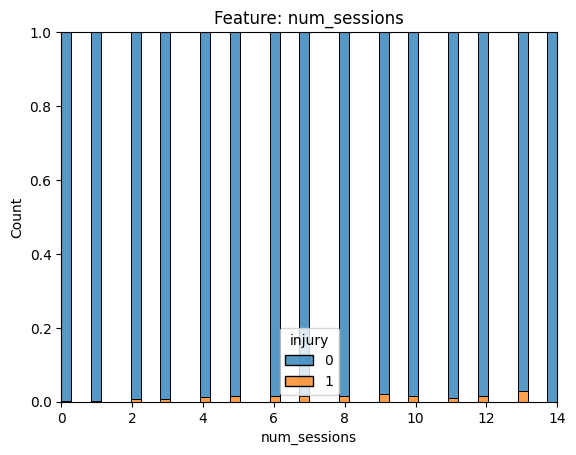

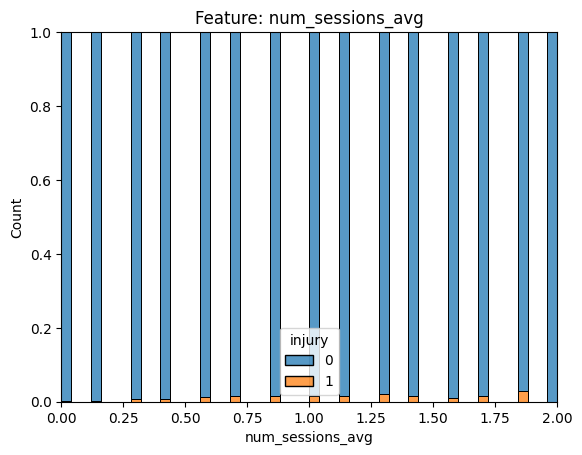

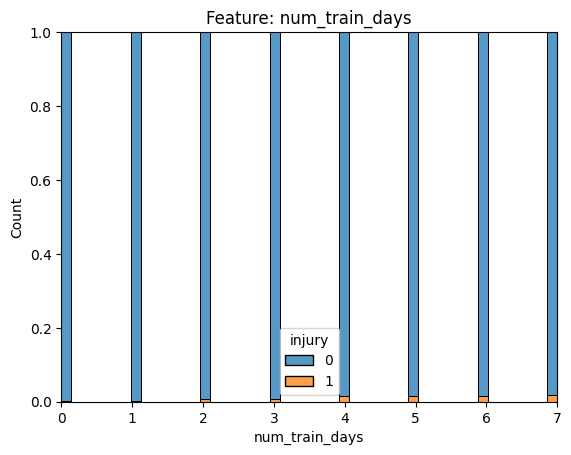

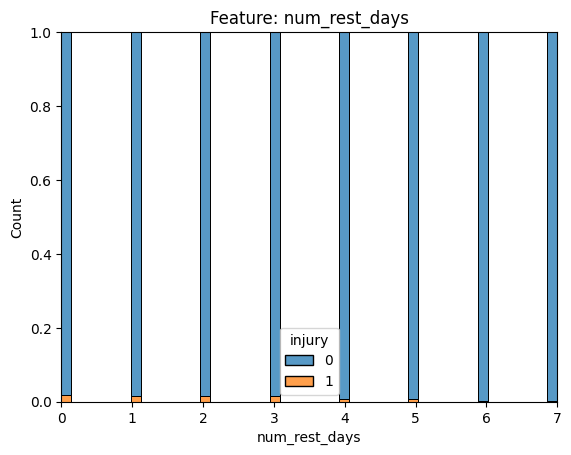

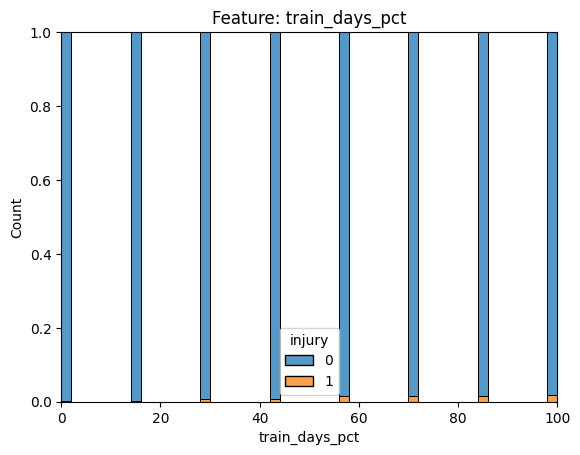

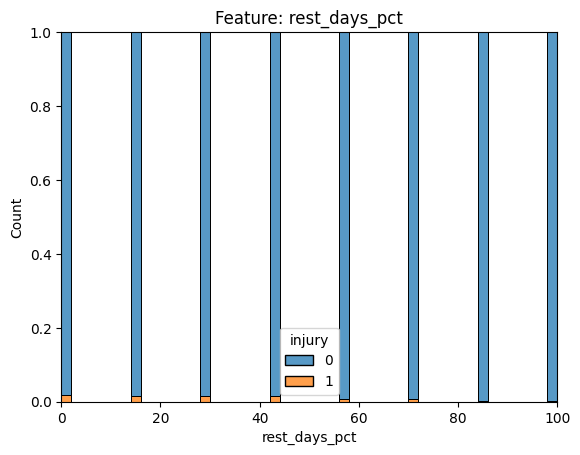

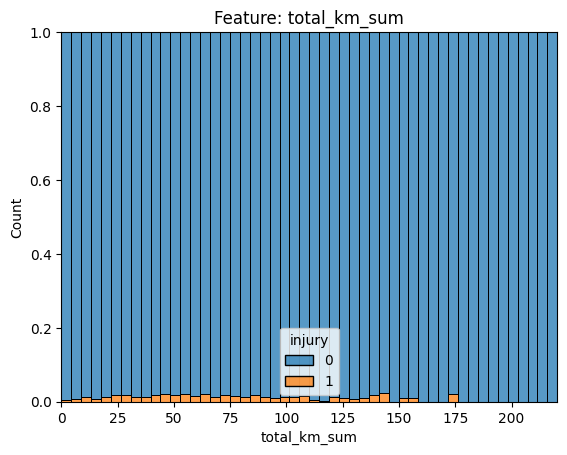

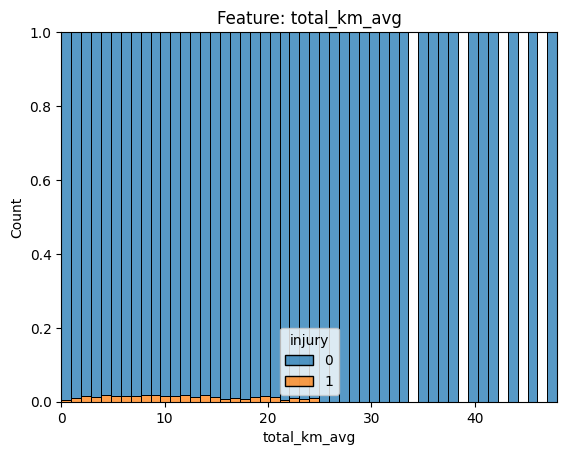

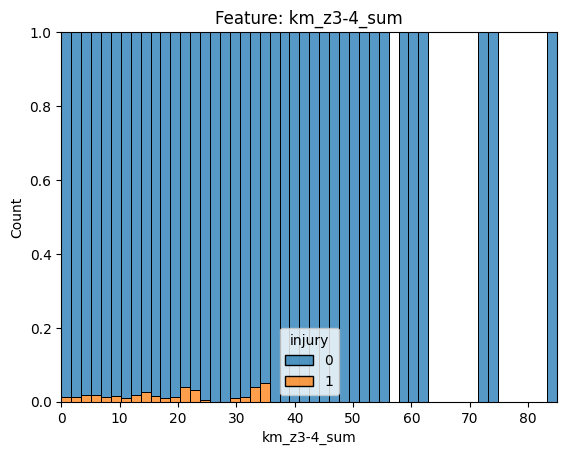

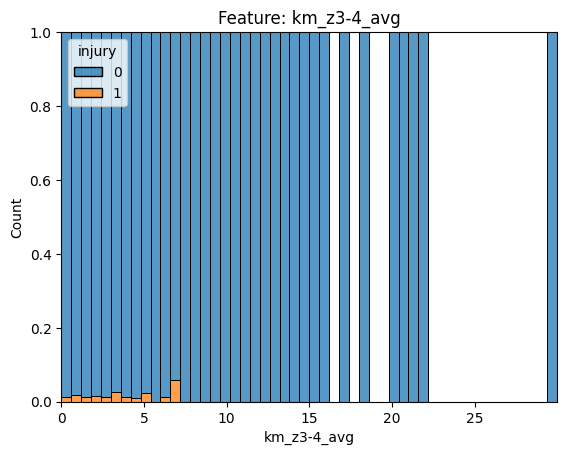

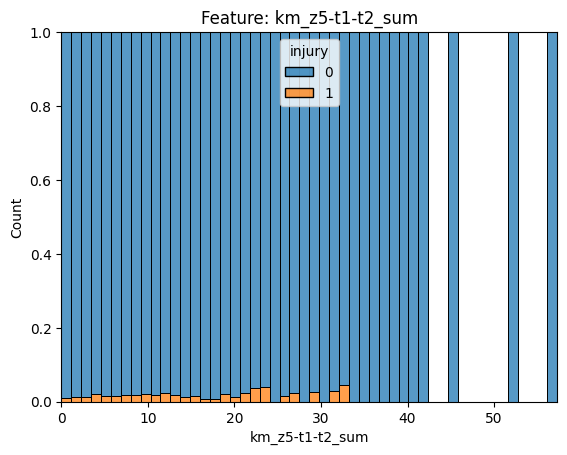

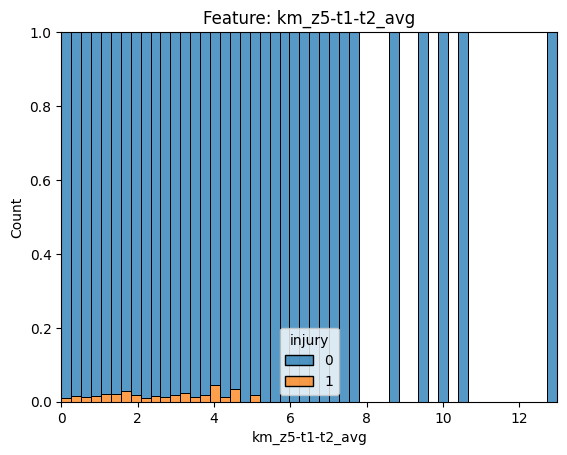

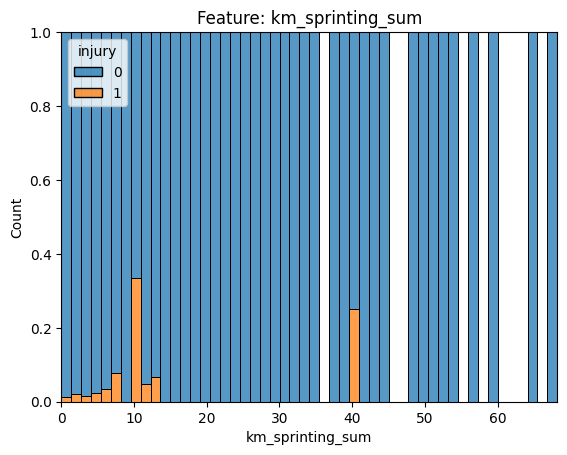

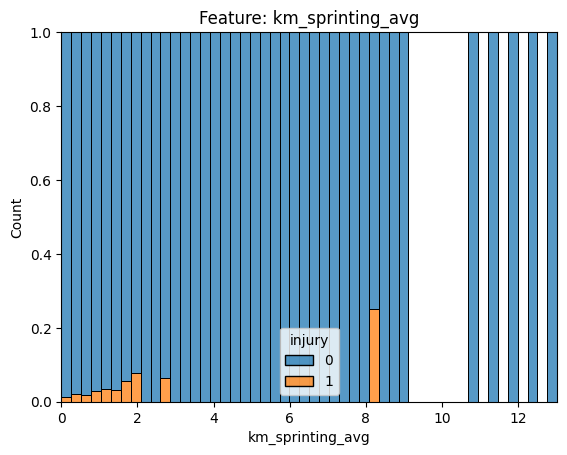

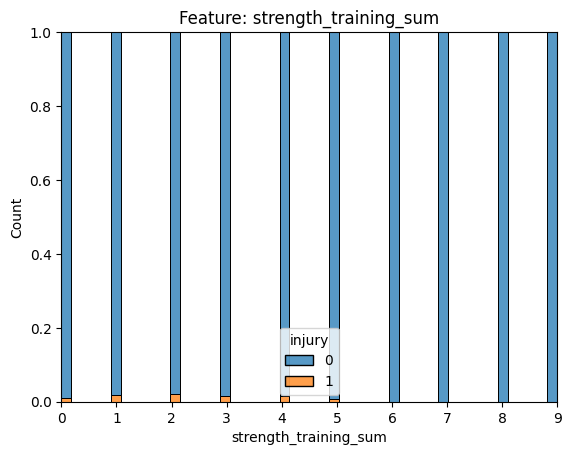

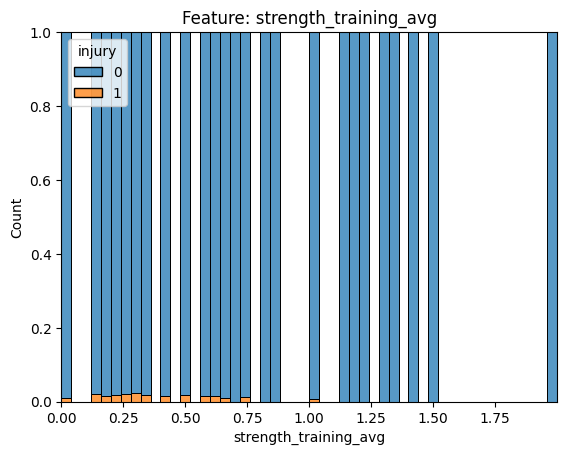

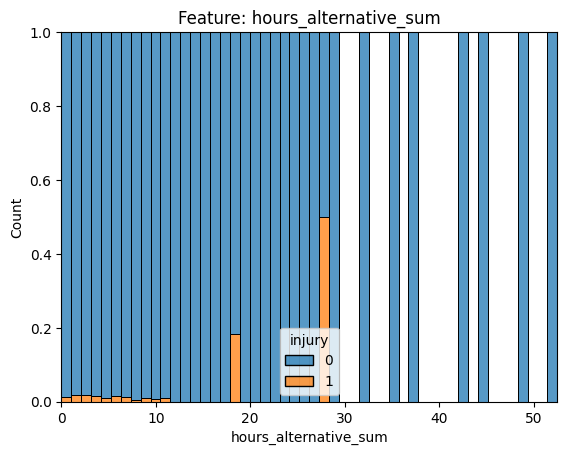

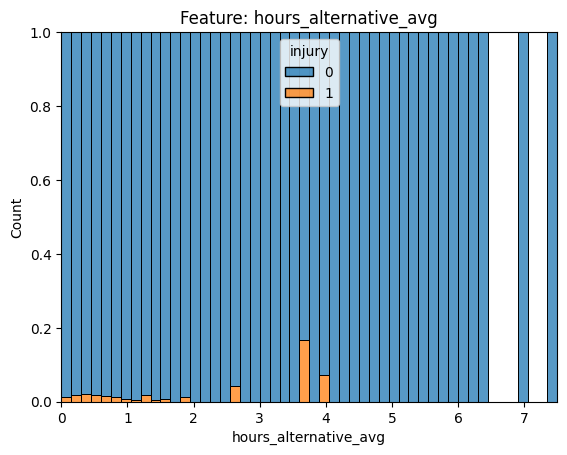

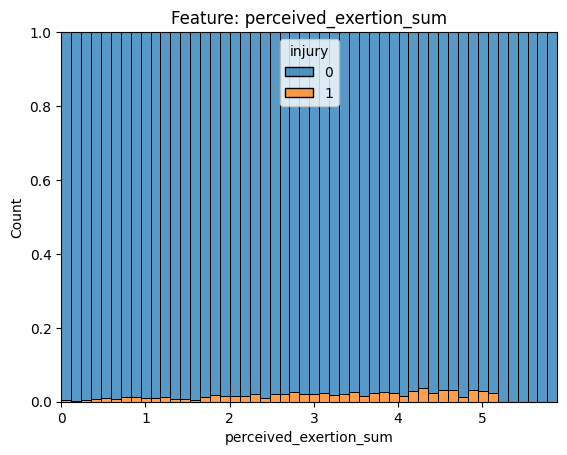

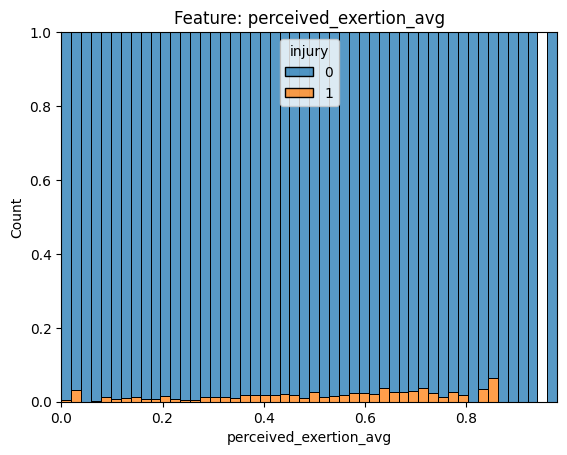

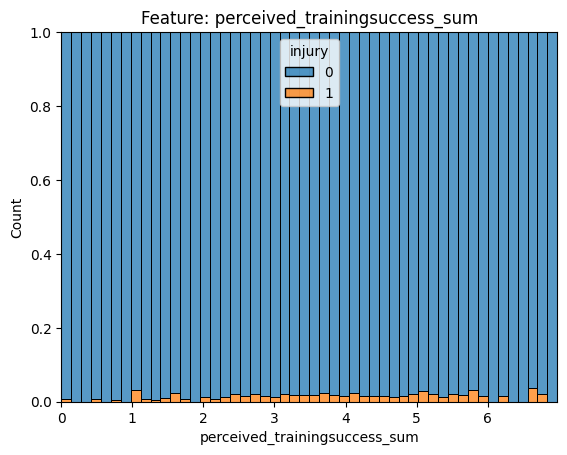

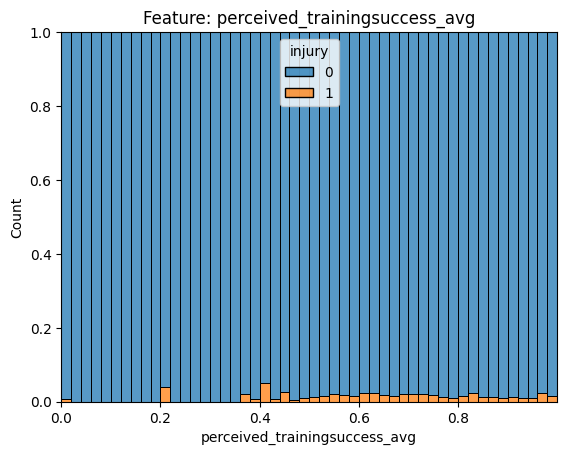

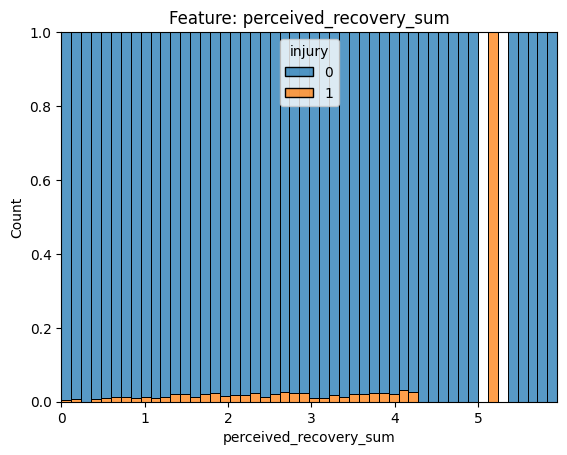

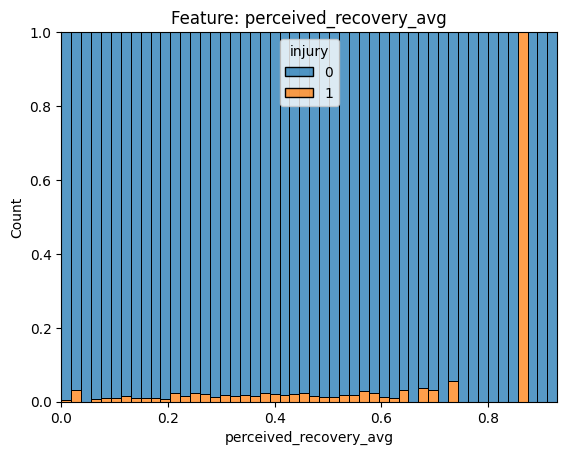

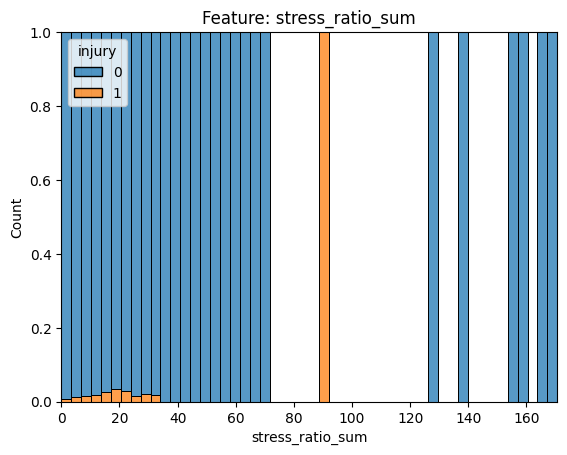

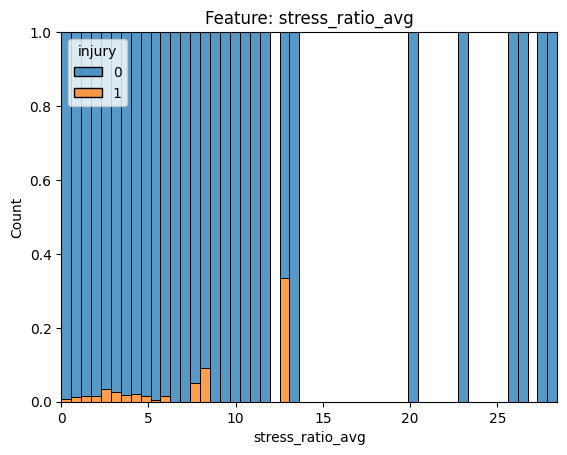

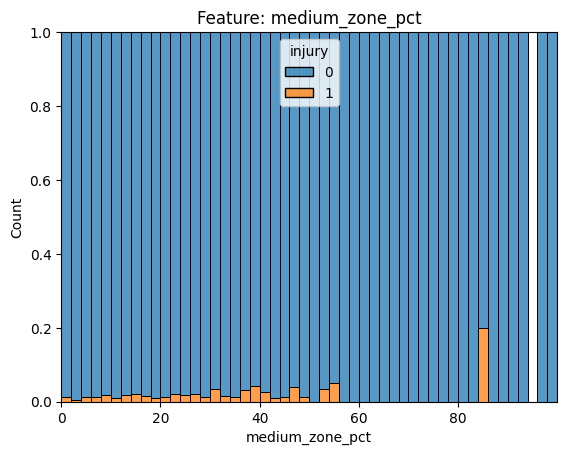

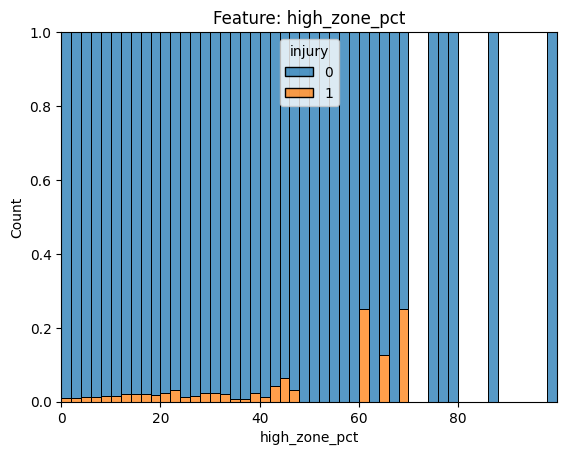

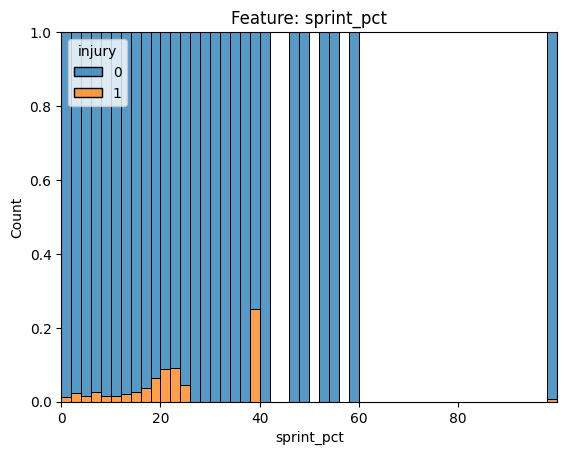

In [21]:

for f in features2:
#     fig, axes = plt.subplots(1, 2, figsize=(18, 5))
#     sns.histplot(df,x=f, hue='injury',stat='percent',ax=axes[0])
#     axes[0].set_title(f"Feature: {f}")
    ax= sns.histplot(data=df, x=f, hue='injury', multiple="fill", element="bars", bins=50)
    ax.set_title(f"Feature: {f}")
    
    plt.show()

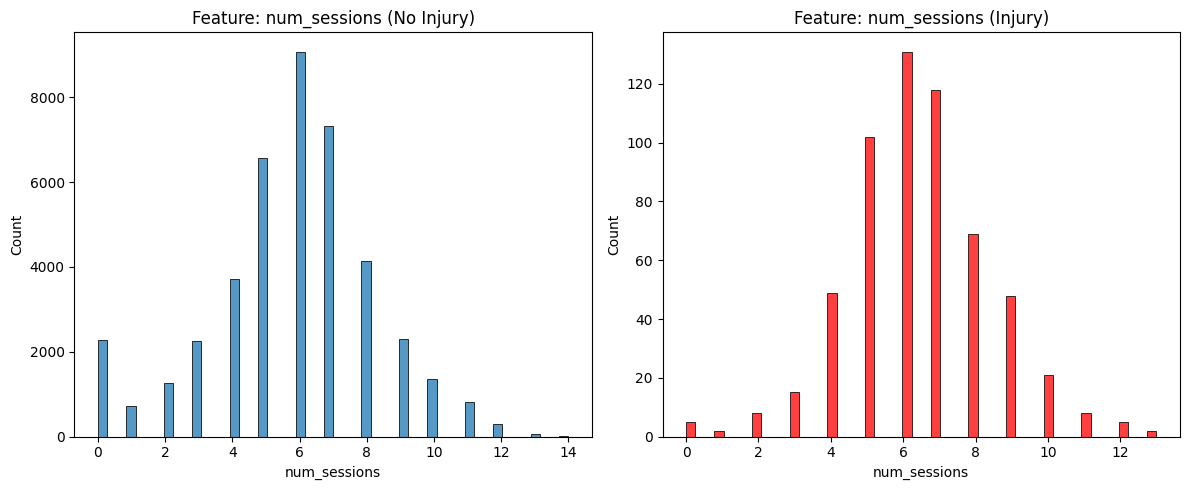

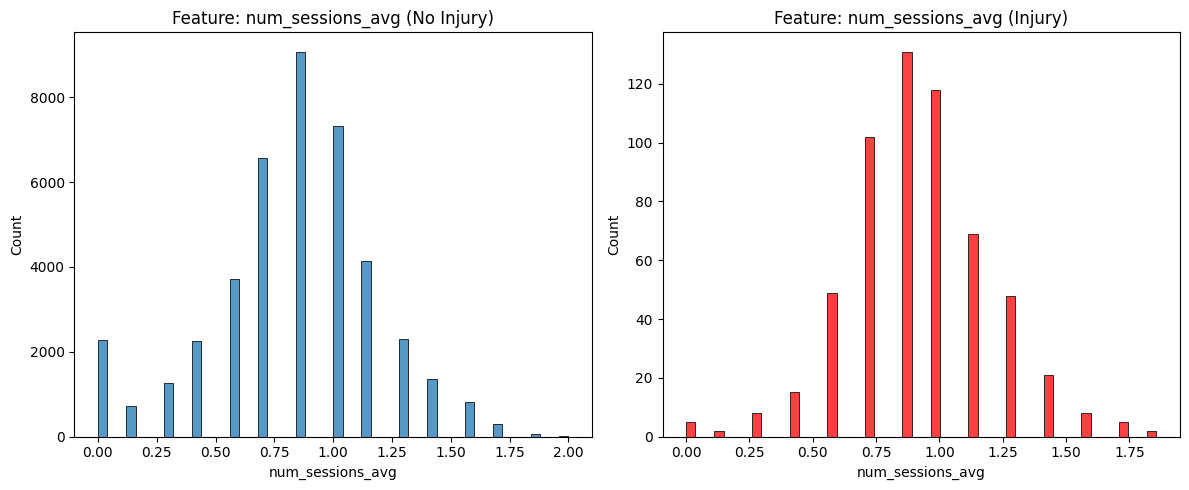

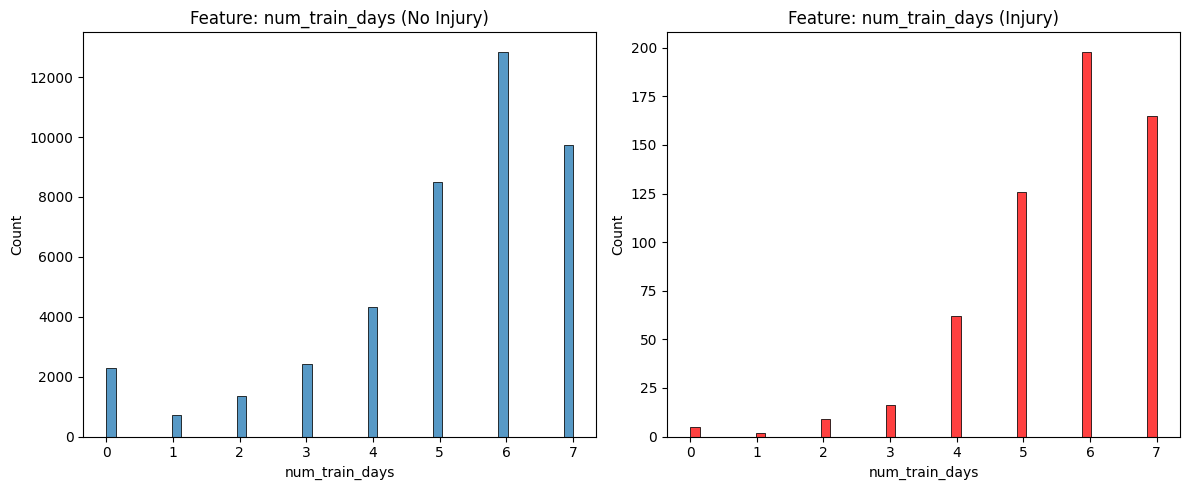

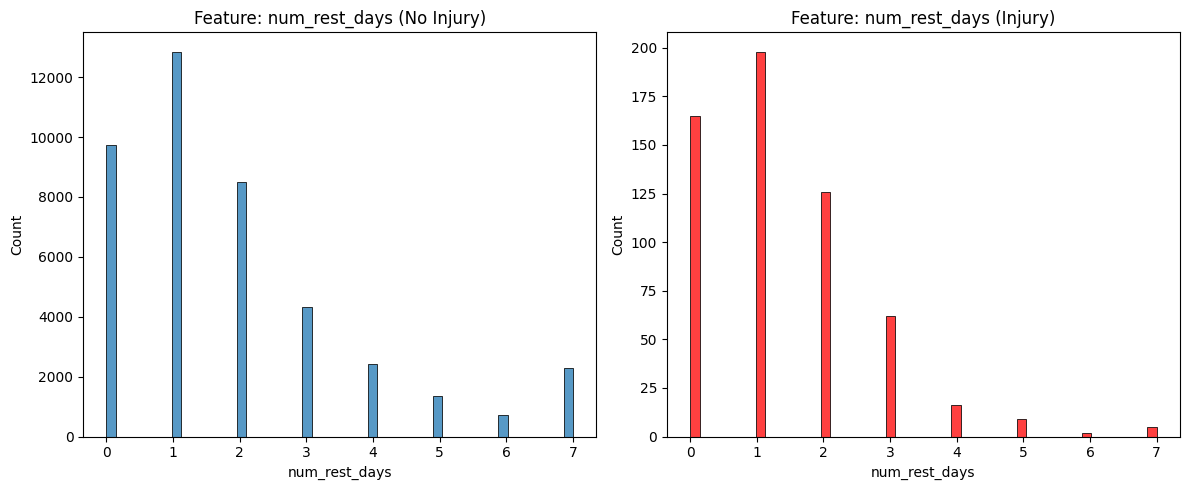

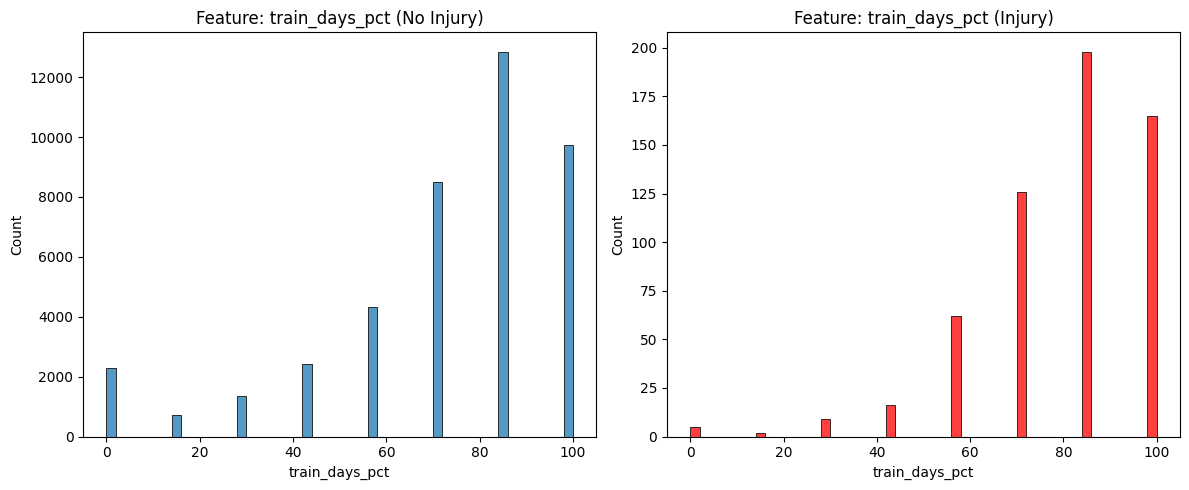

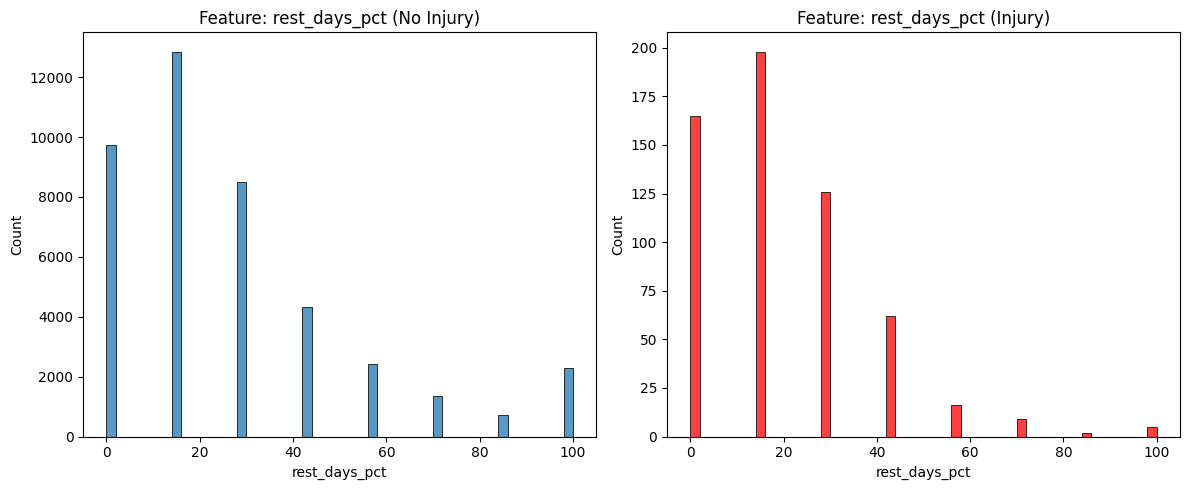

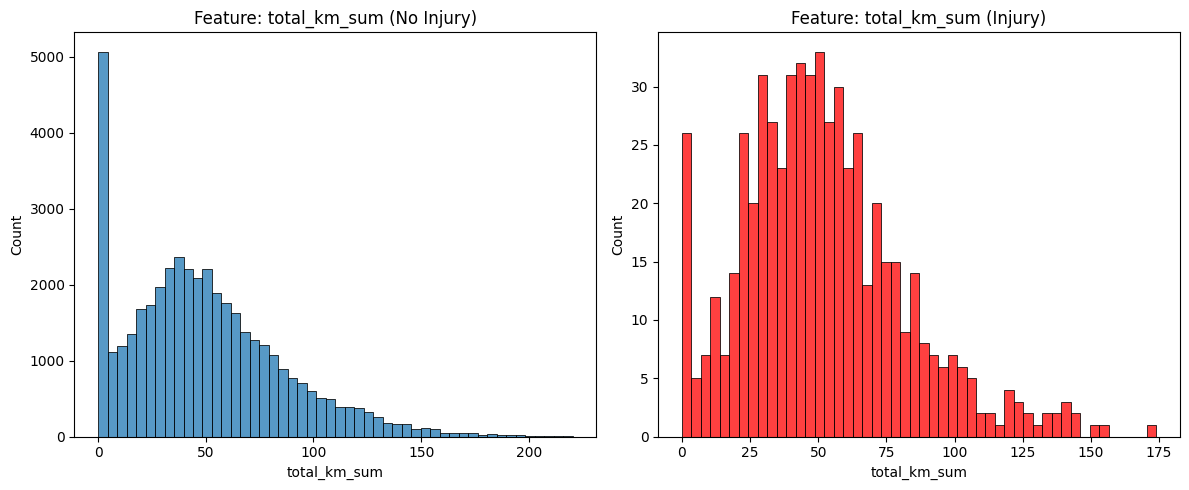

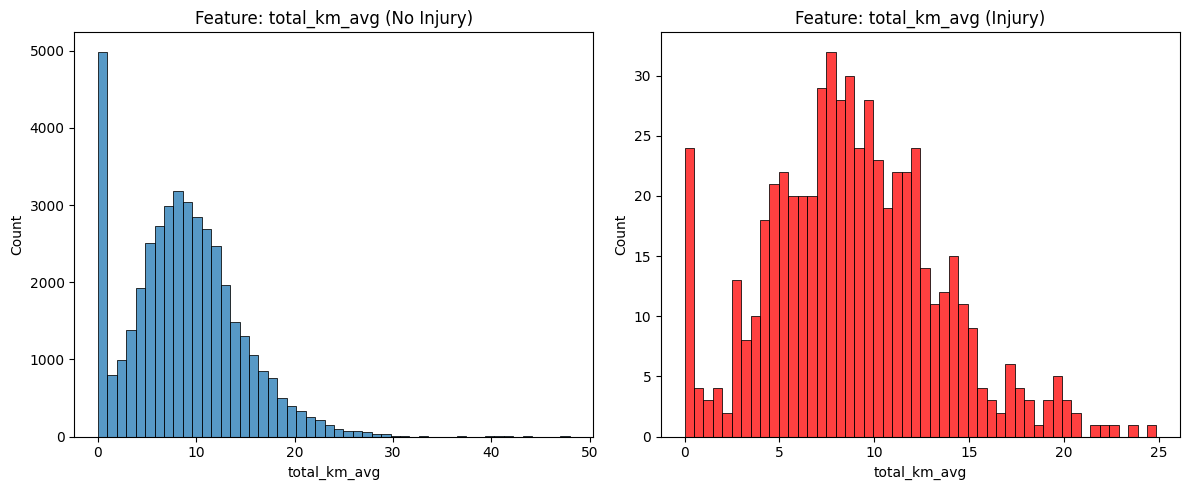

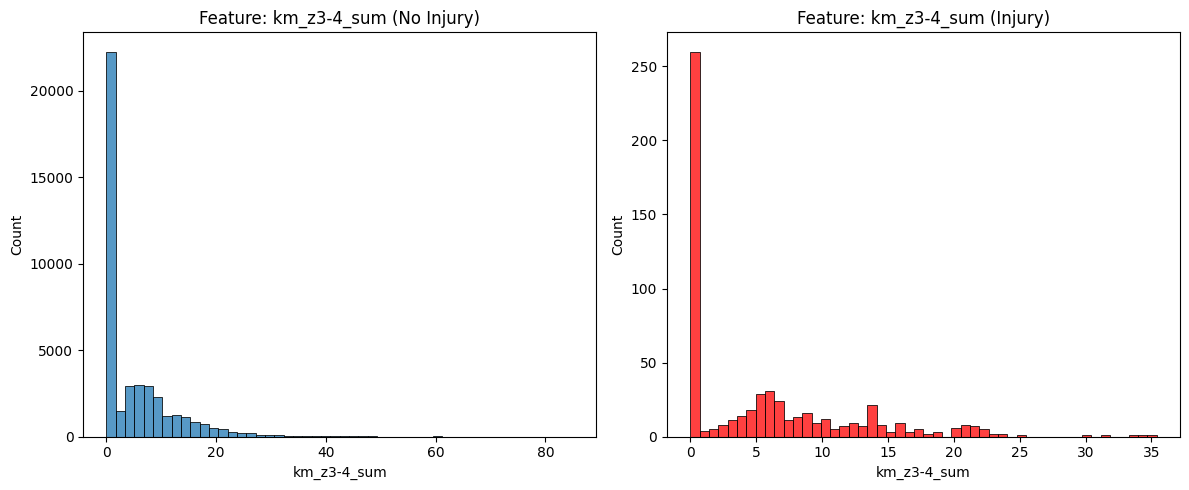

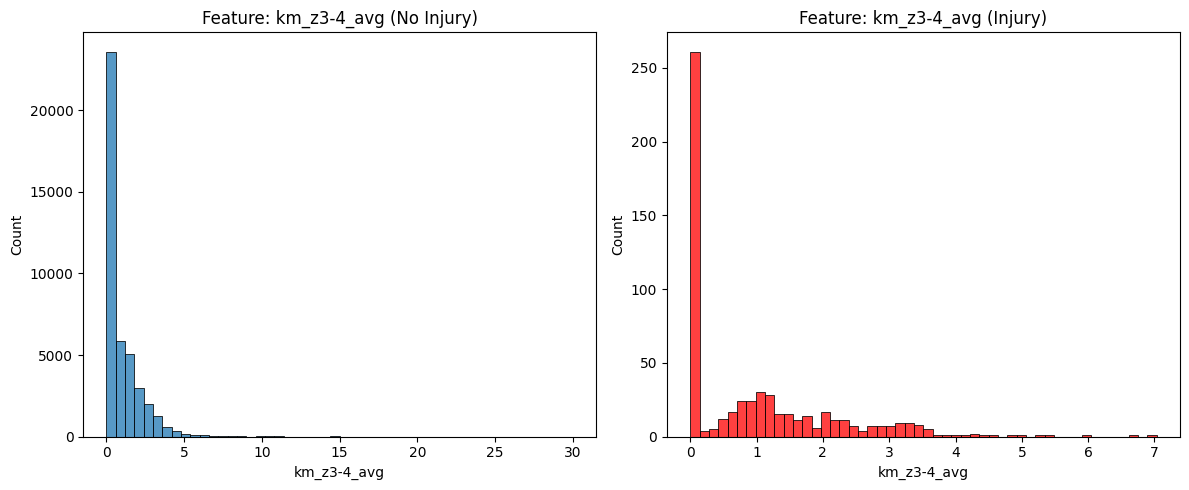

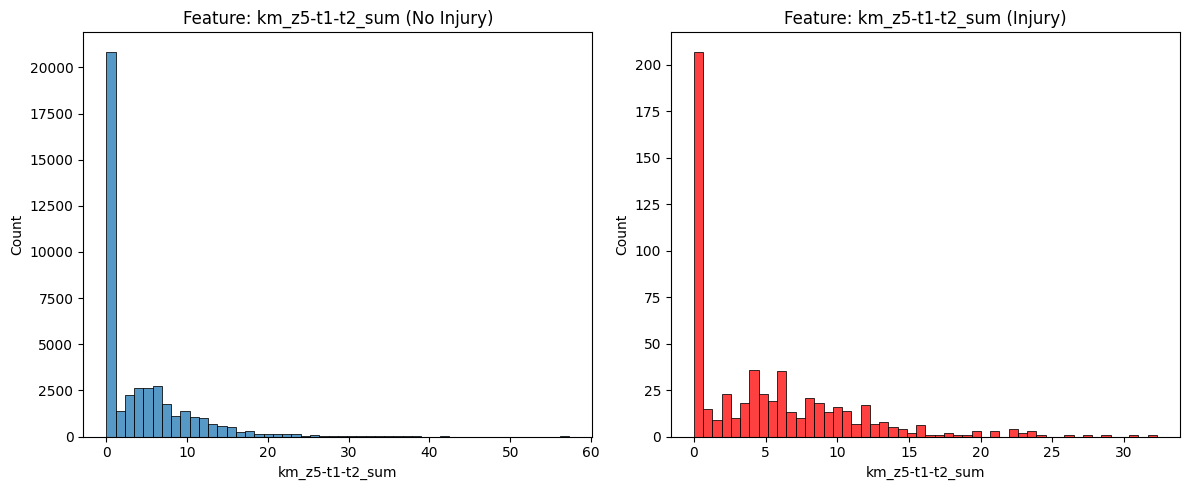

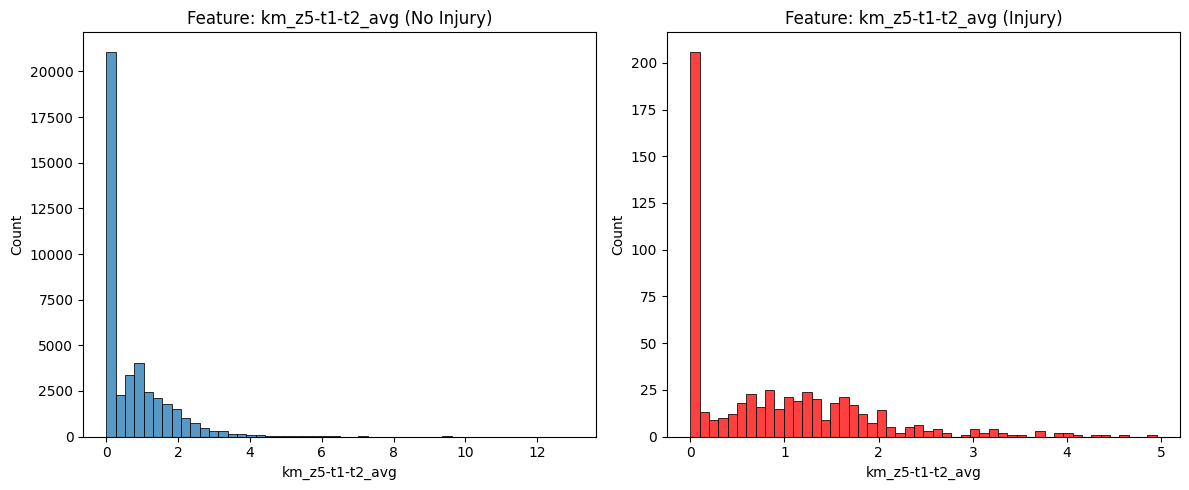

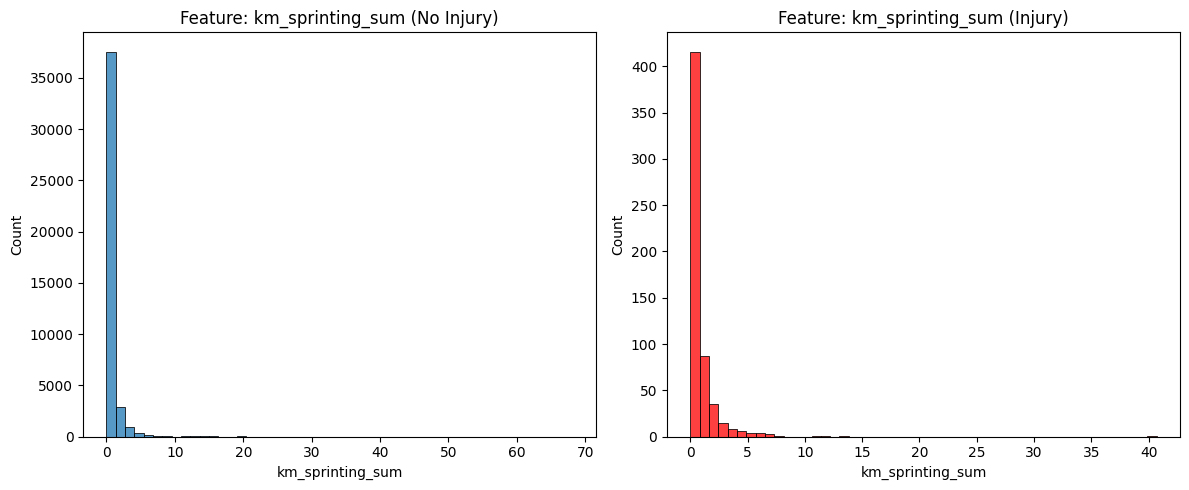

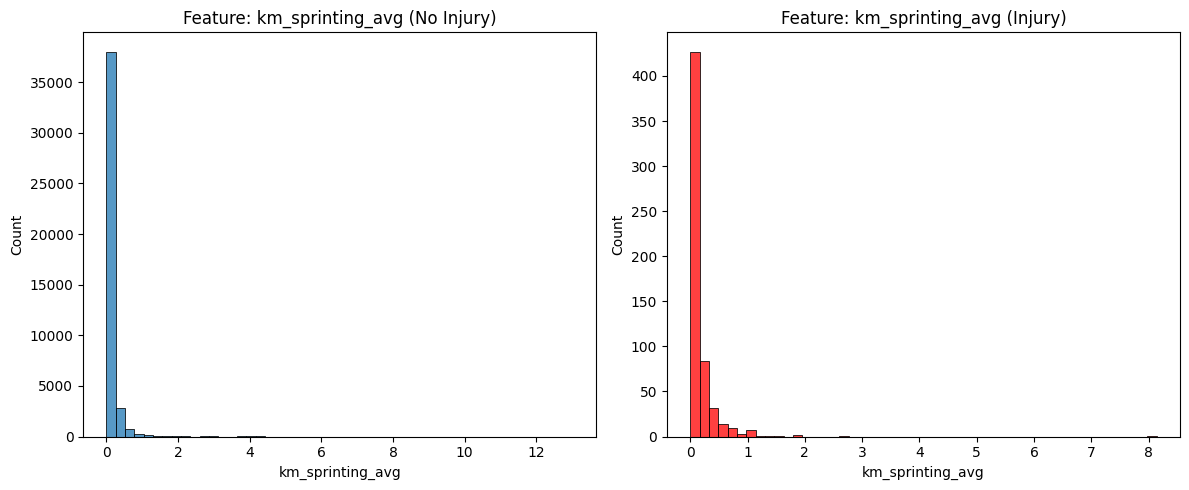

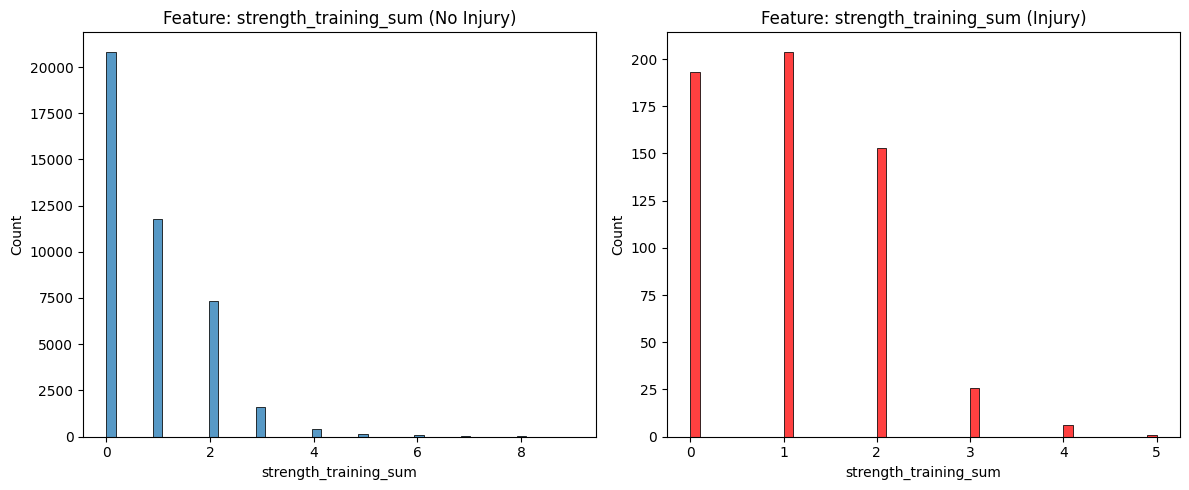

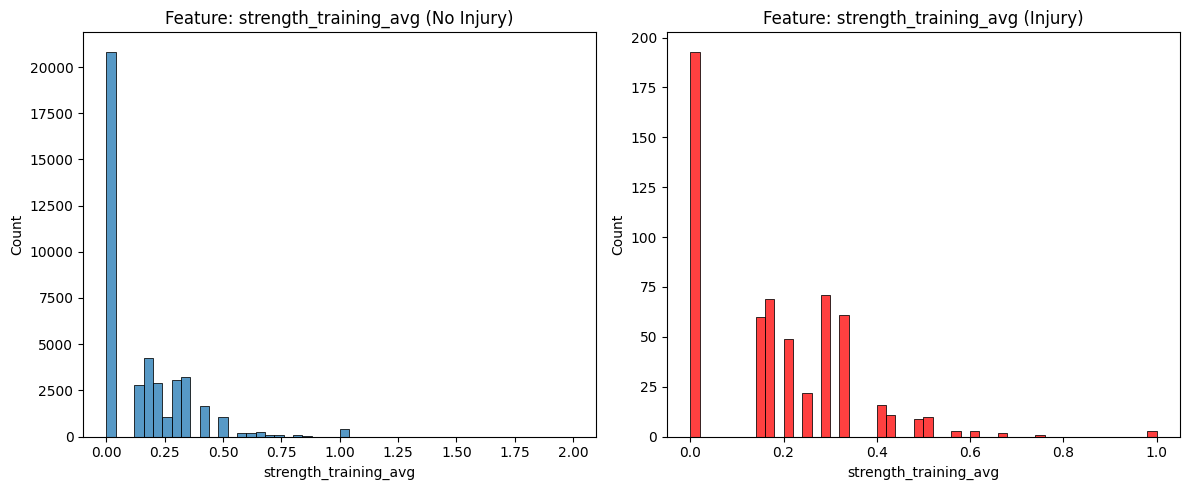

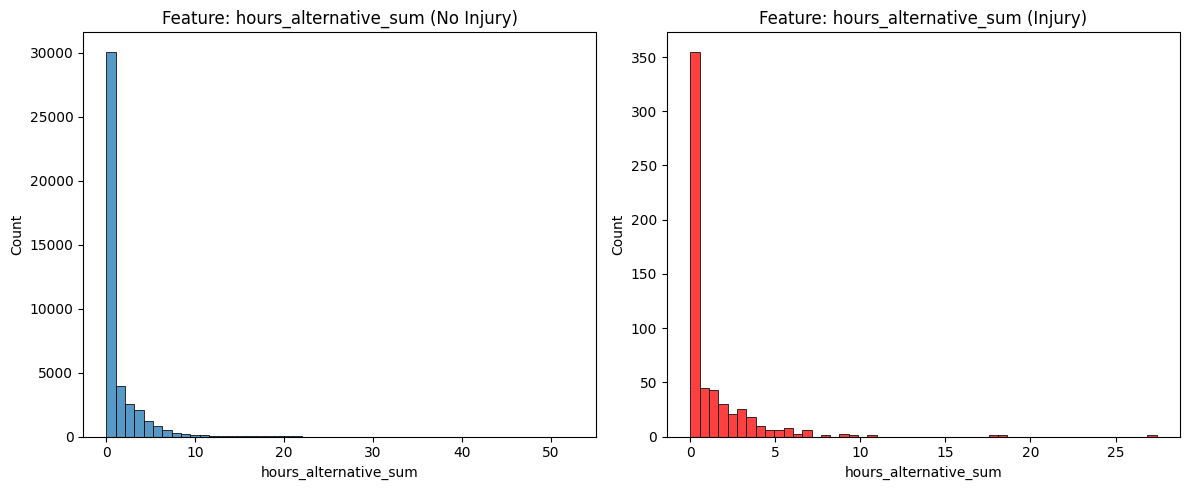

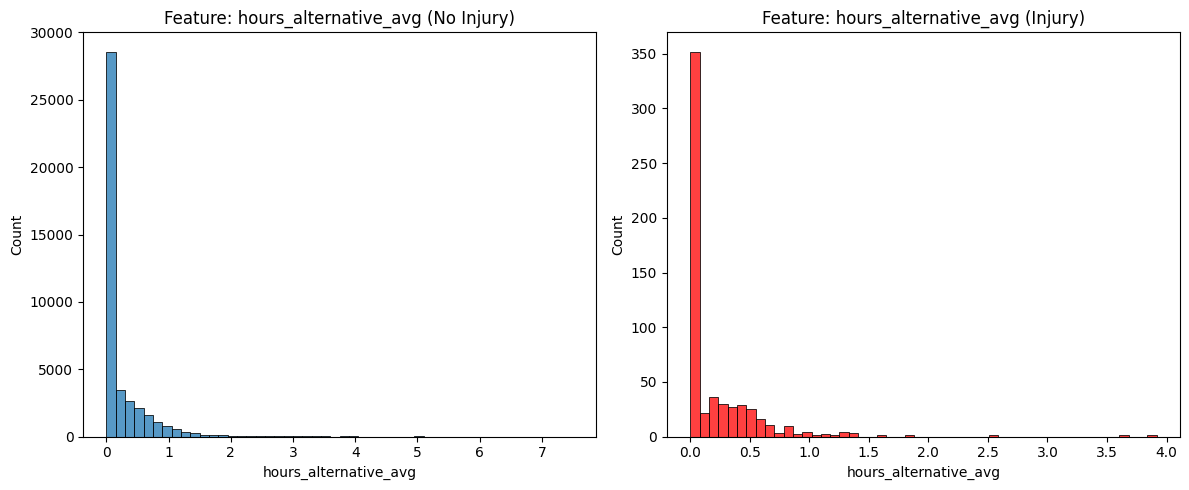

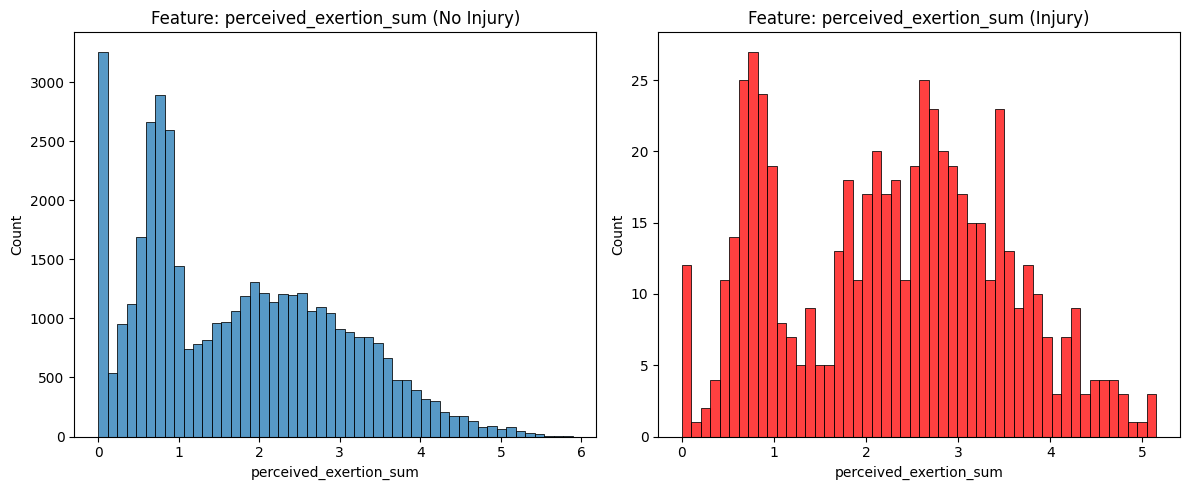

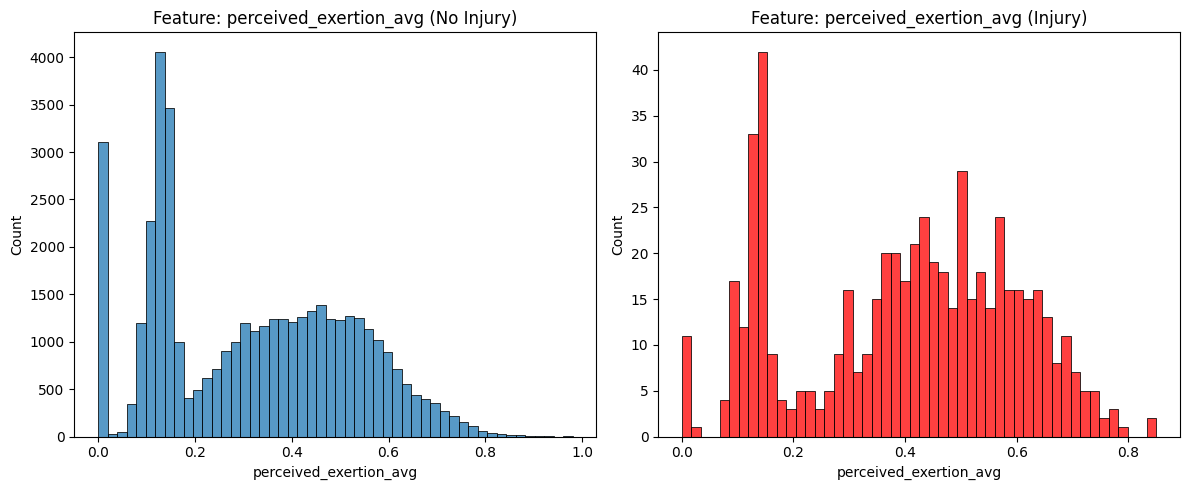

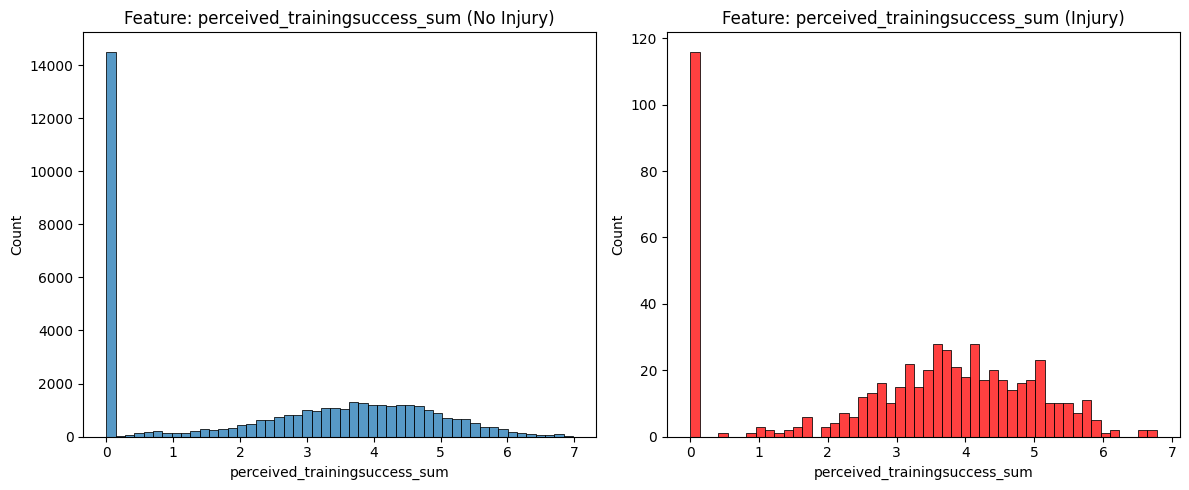

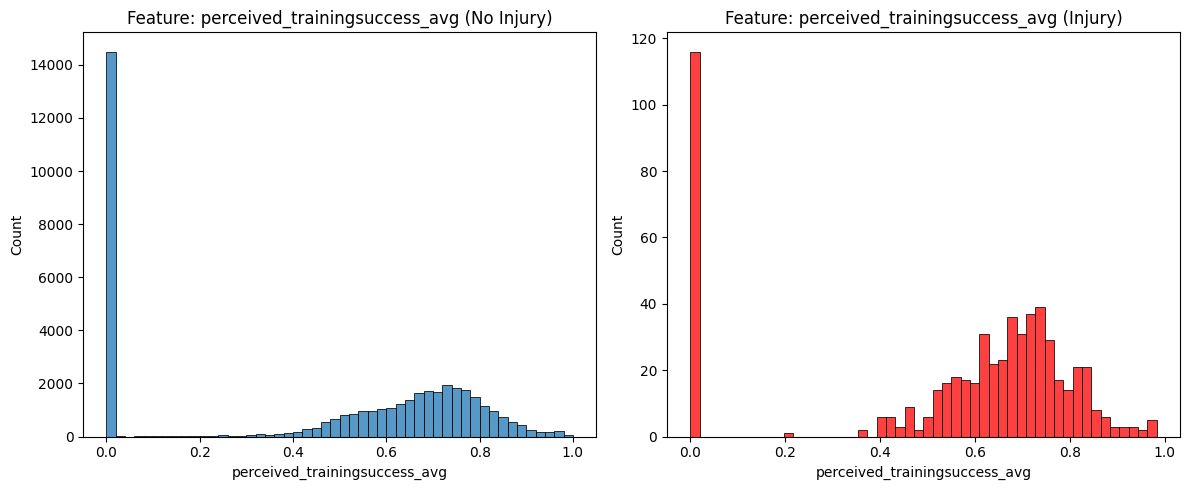

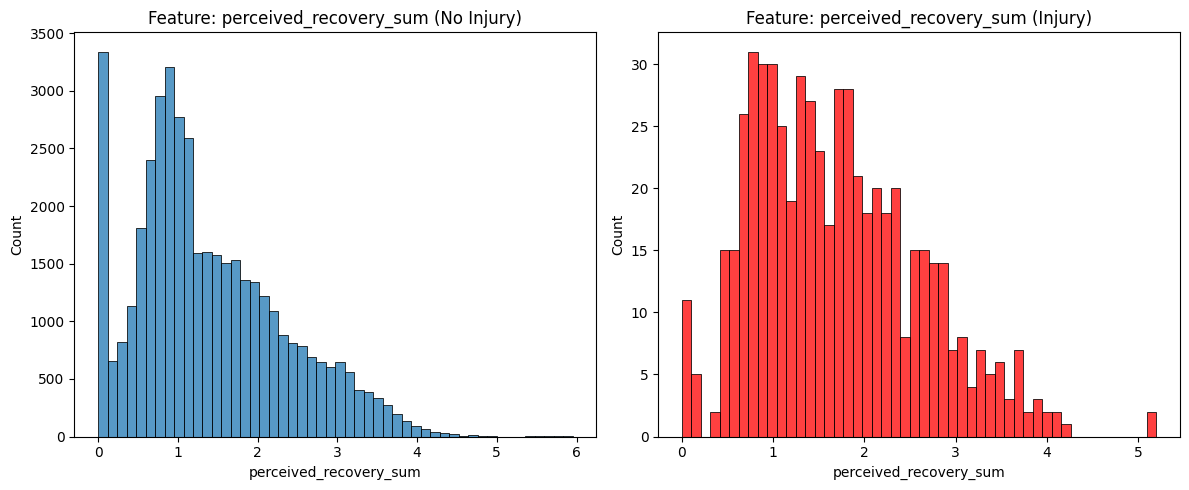

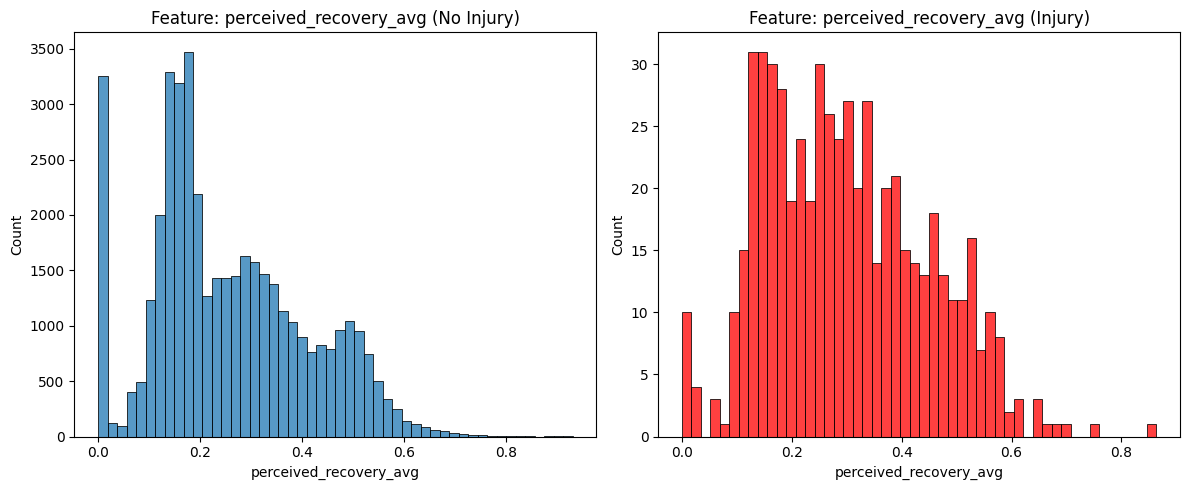

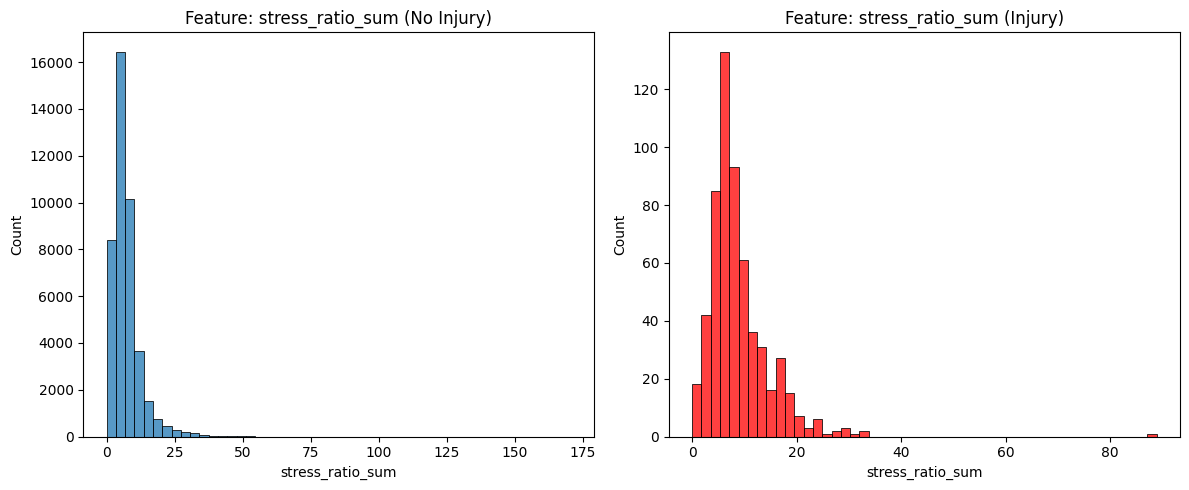

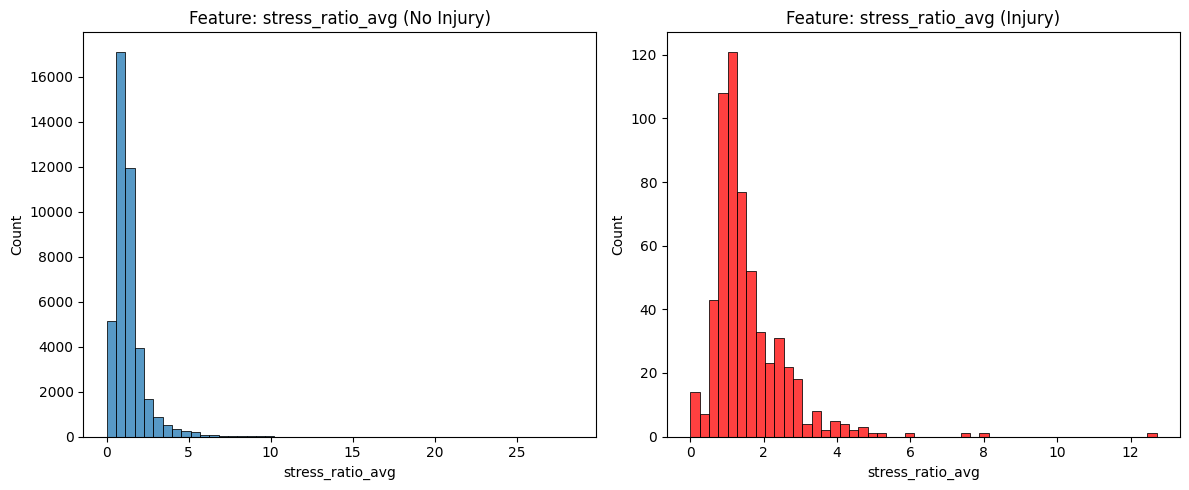

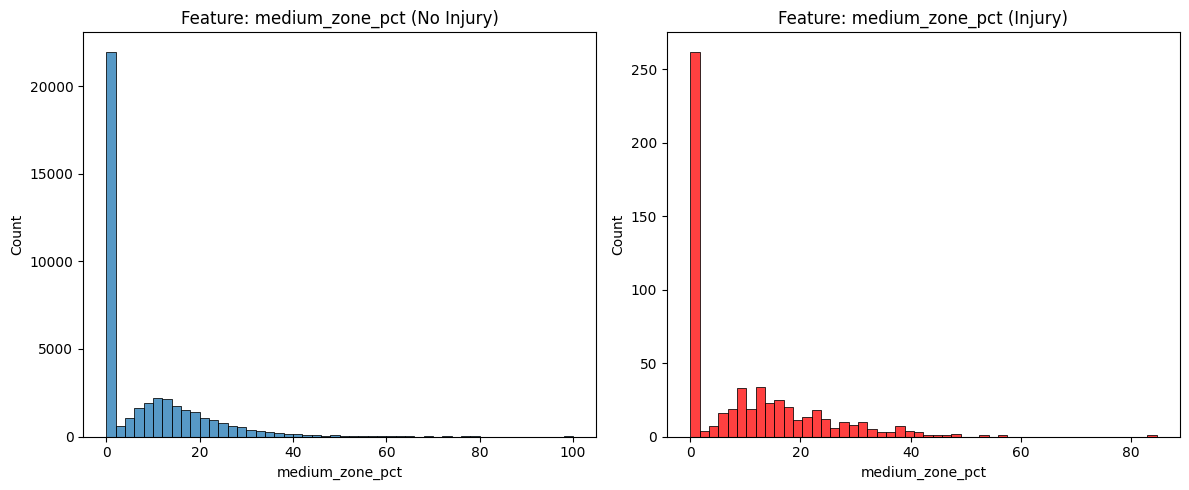

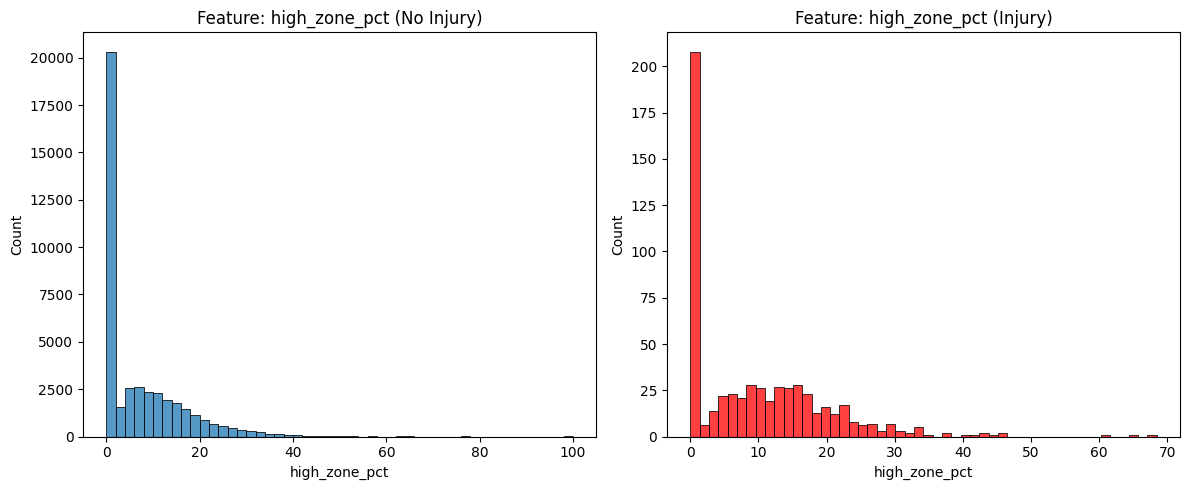

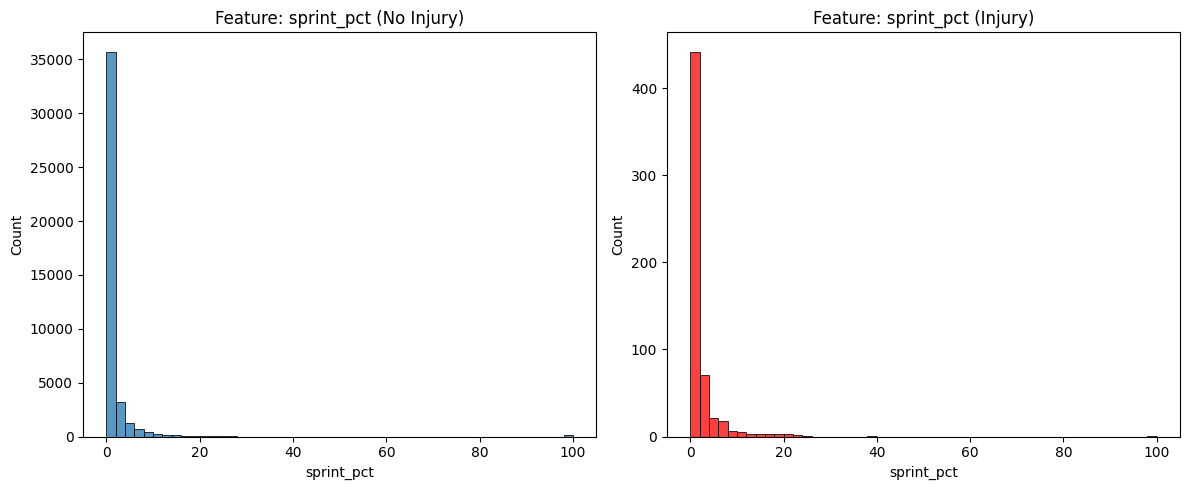

In [22]:
df0 = df[df['injury'] == 0]
df1 = df[df['injury'] == 1]
for f in features2:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(df0, x=f, bins=50, ax=axes[0])
    axes[0].set_title(f"Feature: {f} (No Injury)")

    sns.histplot(df1, x=f, bins=50, ax=axes[1], color='red')
    axes[1].set_title(f"Feature: {f} (Injury)")

    plt.tight_layout()
    plt.show()

In [23]:
injured_runners = df[df['injury']==1]['athlete_id'].unique()
injured_runners

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 13, 14, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 26, 27, 28, 29, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71], dtype=int64)

In [24]:
len(injured_runners)

63

In [25]:
df['date'].nunique()

2614

In [26]:
features2

['num_sessions',
 'num_sessions_avg',
 'num_train_days',
 'num_rest_days',
 'train_days_pct',
 'rest_days_pct',
 'total_km_sum',
 'total_km_avg',
 'km_z3-4_sum',
 'km_z3-4_avg',
 'km_z5-t1-t2_sum',
 'km_z5-t1-t2_avg',
 'km_sprinting_sum',
 'km_sprinting_avg',
 'strength_training_sum',
 'strength_training_avg',
 'hours_alternative_sum',
 'hours_alternative_avg',
 'perceived_exertion_sum',
 'perceived_exertion_avg',
 'perceived_trainingsuccess_sum',
 'perceived_trainingsuccess_avg',
 'perceived_recovery_sum',
 'perceived_recovery_avg',
 'stress_ratio_sum',
 'stress_ratio_avg',
 'medium_zone_pct',
 'high_zone_pct',
 'sprint_pct']

In [27]:
df_runners=df.groupby(['athlete_id'], as_index=False).agg({'injury':'sum', 'date':'nunique'})
df_runners = df_runners.rename(columns={'injury':'injury_ct'})
df_runners['injury_pct']= df_runners['injury_ct']/ df_runners['date'] * 100
df_runners.sort_values(by='injury_pct', ascending=False)

,athlete_id,injury_ct,date,injury_pct
29,29,33,730,4.520548
42,42,32,744,4.301075
26,26,35,884,3.959276
36,36,22,638,3.448276
68,68,8,235,3.404255
...,...,...,...,...
12,12,0,169,0.000000
11,11,0,154,0.000000
31,31,0,231,0.000000
72,72,0,216,0.000000


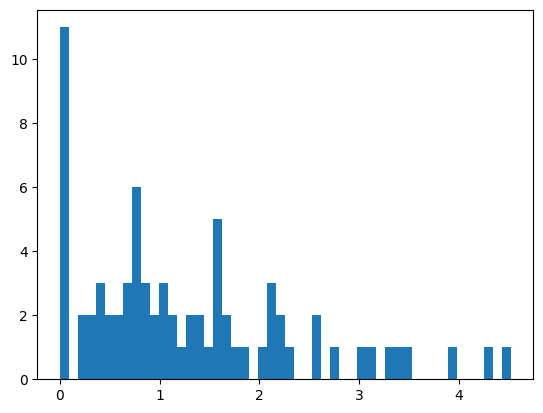

In [28]:
plt.hist(df_runners['injury_pct'], bins=50)
plt.show()

In [29]:
df_corr=df[features2+['injury']].corr()

In [30]:
df_gen = pd.DataFrame()
for f in features2:
    #print(f,"-->",df_corr['injury'][f])
    #if np.abs(df_corr['injury'][f])>=0.1:
    #    print("*****************",f)
    df_gen = pd.concat([df_gen, pd.DataFrame({'Feature':[f],'Corr':[df_corr['injury'][f]],'Corr_abs':[np.abs(df_corr['injury'][f])]})],
                       axis=0,
                       ignore_index=True
                      )
df_gen.sort_values(by='Corr_abs', ascending=False)

,Feature,Corr,Corr_abs
18,perceived_exertion_sum,0.050868,0.050868
19,perceived_exertion_avg,0.048118,0.048118
20,perceived_trainingsuccess_sum,0.038505,0.038505
22,perceived_recovery_sum,0.038337,0.038337
24,stress_ratio_sum,0.035616,0.035616
21,perceived_trainingsuccess_avg,0.034411,0.034411
27,high_zone_pct,0.034163,0.034163
23,perceived_recovery_avg,0.033672,0.033672
2,num_train_days,0.032973,0.032973
5,rest_days_pct,-0.032973,0.032973


for f in features2:
    feat = [f+]
    df['km_mean'] = df[km_cols].mean(axis=1)
df['km_std'] = df[km_cols].std(axis=1)

In [31]:
features

['nr._sessions',
 'total_km',
 'km_z3-4',
 'km_z5-t1-t2',
 'km_sprinting',
 'strength_training',
 'hours_alternative',
 'perceived_exertion',
 'perceived_trainingsuccess',
 'perceived_recovery',
 'medium_zone_pct',
 'high_zone_pct',
 'sprint_pct',
 'stress_ratio']

In [32]:
np.nan * 5

nan

In [33]:
features3=[]
for f in features:
    f_cols= [f+"."+str(i) for i in range(7)]
    df[f+'_mean'] = df[f_cols].applymap(lambda x: np.nan if x < 0 else x).mean(axis=1, skipna=True)
    df[f+'_std'] = df[f_cols].applymap(lambda x: np.nan if x < 0 else x).std(axis=1, skipna=True)
    for i in range(7):
        

        df[f+'_zcore.'+str(i)] = (df[f+"."+str(i)] - df[f+'_mean']) / df[f+'_std']
        if 'perceived' in f:
            flag = df[f+"."+str(i)].map(lambda x : np.nan if x < 0 else 1)
            df[f+'_zcore.'+str(i)] = df[f+'_zcore.'+str(i)] * flag
            
    df = df.drop([f+'_mean',f+'_std'], axis=1)
    
    f3_cols =[f+'_zcore.'+str(i) for i in range(7)]
    df[f+'_zcore_max']=df[f3_cols].abs().max(axis=1, skipna=True)
    features3.append(f+'_zcore_max')
        
    df[f+'_zcore_sum']=0
    features3.append(f+'_zcore_sum')
    

    
    for i in range(7):
        df[f+'_zcore_sum']+= df[f+'_zcore.'+str(i)].map(lambda x : x if (x>0) and not (np.isnan(x)) else 0)
    
    
        

C:\Users\User\AppData\Local\Temp\ipykernel_19592\2492050261.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[f+'_mean'] = df[f_cols].applymap(lambda x: np.nan if x < 0 else x).mean(axis=1, skipna=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19592\2492050261.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[f+'_std'] = df[f_cols].applymap(lambda x: np.nan if x < 0 else x).std(axis=1, skipna=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19592\2492050261.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[f+'_mean'] = df[f_cols].applymap(lambda x: np.nan if x < 0 else x).mean(axis=1, skipna=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19592\2492050261.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[f+'_std'] = df[f_cols].applymap(lambda x: np.nan if x < 0 else x).std(axis=1, skipna=True)
C:\Users\User\AppDat

C:\Users\User\AppData\Local\Temp\ipykernel_19592\2492050261.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[f+'_mean'] = df[f_cols].applymap(lambda x: np.nan if x < 0 else x).mean(axis=1, skipna=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19592\2492050261.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f+'_mean'] = df[f_cols].applymap(lambda x: np.nan if x < 0 else x).mean(axis=1, skipna=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19592\2492050261.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[f+'_std'] = df[f_cols].applymap(lambda x: np.nan if x < 0 else x).std(axis=1, skipna=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19592\2492050261.py:5: Per

C:\Users\User\AppData\Local\Temp\ipykernel_19592\2492050261.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f+'_zcore_max']=df[f3_cols].abs().max(axis=1, skipna=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19592\2492050261.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f+'_zcore_sum']=0
C:\Users\User\AppData\Local\Temp\ipykernel_19592\2492050261.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[f+'_mean'] = df[f_cols].applymap(lambda x: np.nan if x < 0 else x).mean(

C:\Users\User\AppData\Local\Temp\ipykernel_19592\2492050261.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f+'_zcore.'+str(i)] = (df[f+"."+str(i)] - df[f+'_mean']) / df[f+'_std']
C:\Users\User\AppData\Local\Temp\ipykernel_19592\2492050261.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f+'_zcore_max']=df[f3_cols].abs().max(axis=1, skipna=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19592\2492050261.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

C:\Users\User\AppData\Local\Temp\ipykernel_19592\2492050261.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[f+'_mean'] = df[f_cols].applymap(lambda x: np.nan if x < 0 else x).mean(axis=1, skipna=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19592\2492050261.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f+'_mean'] = df[f_cols].applymap(lambda x: np.nan if x < 0 else x).mean(axis=1, skipna=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19592\2492050261.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[f+'_std'] = df[f_cols].applymap(lambda x: np.nan if x < 0 else x).std(axis=1, skipna=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19592\2492050261.py:5: Per

In [34]:
features3

['nr._sessions_zcore_max',
 'nr._sessions_zcore_sum',
 'total_km_zcore_max',
 'total_km_zcore_sum',
 'km_z3-4_zcore_max',
 'km_z3-4_zcore_sum',
 'km_z5-t1-t2_zcore_max',
 'km_z5-t1-t2_zcore_sum',
 'km_sprinting_zcore_max',
 'km_sprinting_zcore_sum',
 'strength_training_zcore_max',
 'strength_training_zcore_sum',
 'hours_alternative_zcore_max',
 'hours_alternative_zcore_sum',
 'perceived_exertion_zcore_max',
 'perceived_exertion_zcore_sum',
 'perceived_trainingsuccess_zcore_max',
 'perceived_trainingsuccess_zcore_sum',
 'perceived_recovery_zcore_max',
 'perceived_recovery_zcore_sum',
 'medium_zone_pct_zcore_max',
 'medium_zone_pct_zcore_sum',
 'high_zone_pct_zcore_max',
 'high_zone_pct_zcore_sum',
 'sprint_pct_zcore_max',
 'sprint_pct_zcore_sum',
 'stress_ratio_zcore_max',
 'stress_ratio_zcore_sum']

In [35]:
df[features3].describe()

,nr._sessions_zcore_max,nr._sessions_zcore_sum,total_km_zcore_max,total_km_zcore_sum,km_z3-4_zcore_max,km_z3-4_zcore_sum,km_z5-t1-t2_zcore_max,km_z5-t1-t2_zcore_sum,km_sprinting_zcore_max,km_sprinting_zcore_sum,...,perceived_recovery_zcore_max,perceived_recovery_zcore_sum,medium_zone_pct_zcore_max,medium_zone_pct_zcore_sum,high_zone_pct_zcore_max,high_zone_pct_zcore_sum,sprint_pct_zcore_max,sprint_pct_zcore_sum,stress_ratio_zcore_max,stress_ratio_zcore_sum
count,36857.000000,42766.000000,38447.000000,42766.000000,20823.000000,42766.000000,22647.000000,42766.000000,12523.000000,42766.000000,...,38087.000000,42766.000000,20823.000000,42766.000000,22647.000000,42766.000000,12523.000000,42766.000000,39508.000000,42766.000000
mean,1.670723,2.272041,1.563488,2.502709,2.041434,1.223836,1.992162,1.362584,2.013192,0.737584,...,1.505712,1.872339,2.022427,1.231553,1.956713,1.379550,2.033788,0.734826,1.685075,2.467315
std,0.439952,1.000687,0.311983,0.878741,0.309628,1.274873,0.310281,1.303701,0.344764,1.158791,...,0.316812,0.852498,0.324058,1.283858,0.326497,1.321029,0.323155,1.154105,0.325768,0.762673
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.044466,0.000000,1.000000,0.000000,...,0.707107,0.000000,1.004140,0.000000,1.039402,0.000000,1.032094,0.000000,1.023748,0.000000
25%,1.463850,2.267787,1.334102,2.491889,1.792732,0.000000,1.732051,0.000000,1.733340,0.000000,...,1.299459,1.507557,1.737511,0.000000,1.669716,0.000000,1.800648,0.000000,1.421477,2.339434
50%,1.656157,2.484236,1.500436,2.785295,2.267787,0.000000,2.117734,2.267787,2.267787,0.000000,...,1.500000,2.049902,2.267787,0.000000,2.034677,2.267787,2.267787,0.000000,1.659595,2.676220
75%,2.267787,2.927700,1.780338,2.969230,2.267787,2.267787,2.267787,2.611165,2.267787,2.267787,...,1.724483,2.449490,2.267787,2.267787,2.267787,2.726969,2.267787,2.267787,1.960473,2.873512
max,2.267787,3.207135,2.267787,3.207135,2.267787,3.207135,2.267787,3.207135,2.267787,3.207135,...,2.267787,6.480741,2.267787,3.207135,2.267787,3.207135,2.267787,3.207135,2.267787,3.207135


In [36]:
df_corr2=df[features3+['injury']].corr()

In [37]:
df_runner_dev = pd.DataFrame()
for f in features3:
    #print(f,"-->",df_corr['injury'][f])
    #if np.abs(df_corr['injury'][f])>=0.1:
    #    print("*****************",f)
    df_runner_dev = pd.concat([df_runner_dev, pd.DataFrame({'Feature':[f],'Corr':[df_corr2['injury'][f]],'Corr_abs':[np.abs(df_corr2['injury'][f])]})],
                       axis=0,
                       ignore_index=True
                      )
df_runner_dev.sort_values(by='Corr_abs', ascending=False)

,Feature,Corr,Corr_abs
17,perceived_trainingsuccess_zcore_sum,0.039467,0.039467
11,strength_training_zcore_sum,0.038310,0.038310
19,perceived_recovery_zcore_sum,0.034941,0.034941
15,perceived_exertion_zcore_sum,0.032181,0.032181
23,high_zone_pct_zcore_sum,0.027406,0.027406
7,km_z5-t1-t2_zcore_sum,0.027394,0.027394
3,total_km_zcore_sum,0.026813,0.026813
9,km_sprinting_zcore_sum,0.023210,0.023210
24,sprint_pct_zcore_max,0.022855,0.022855
27,stress_ratio_zcore_sum,0.022141,0.022141


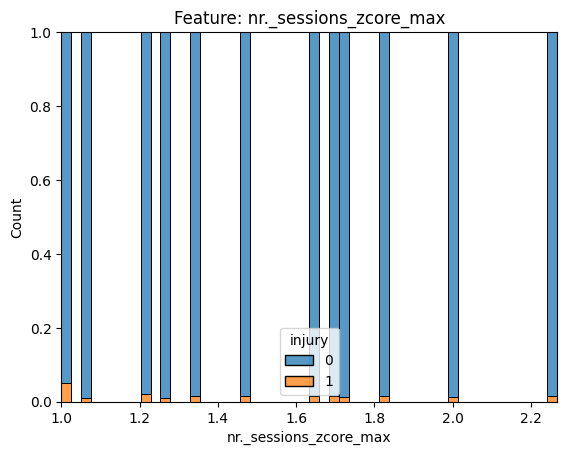

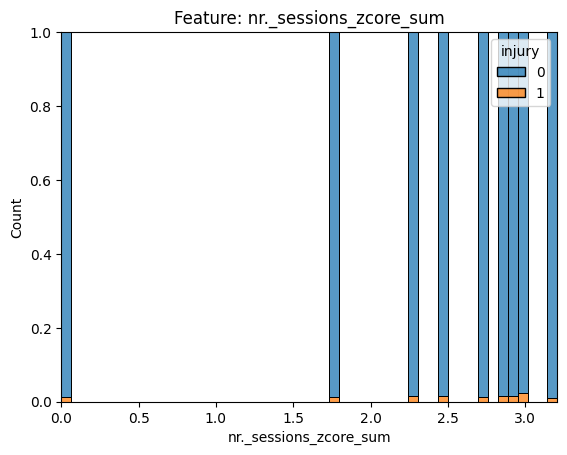

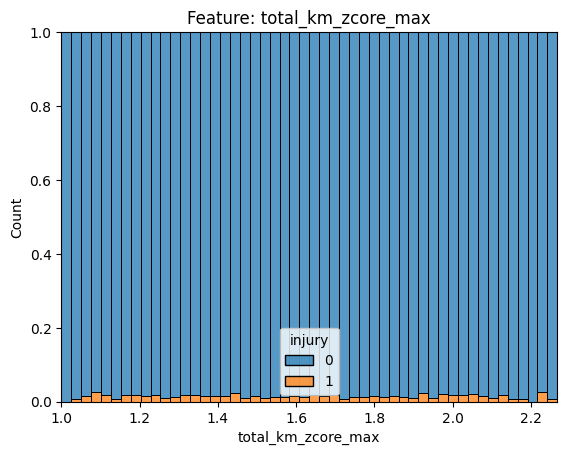

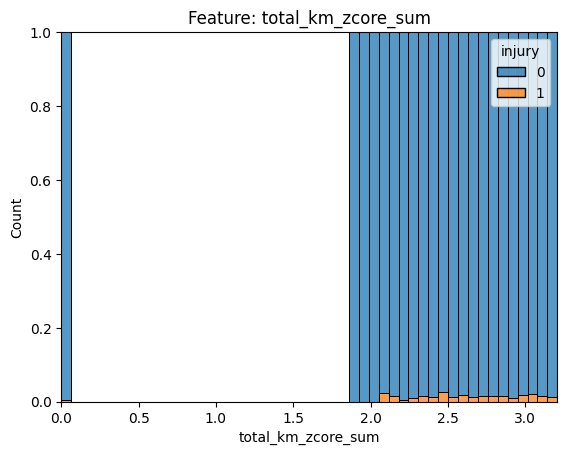

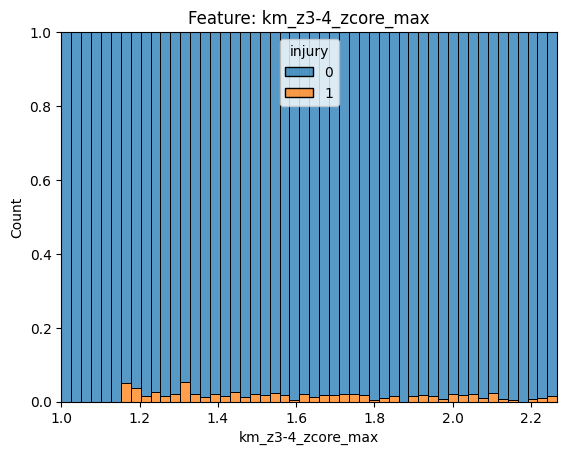

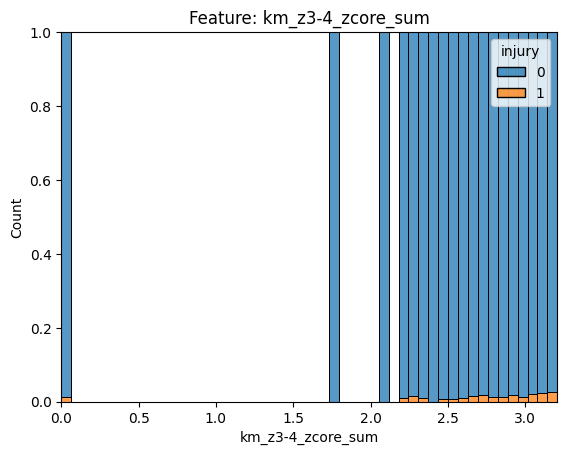

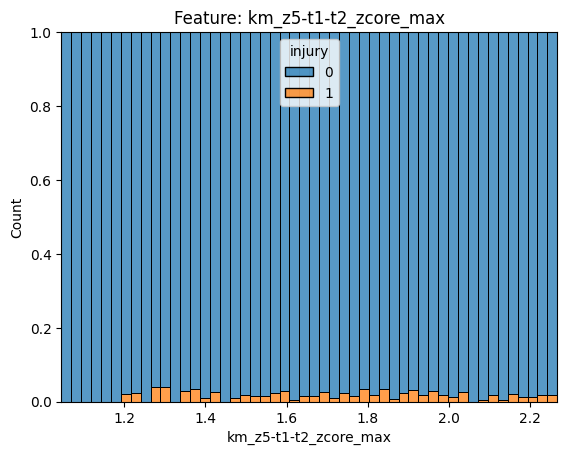

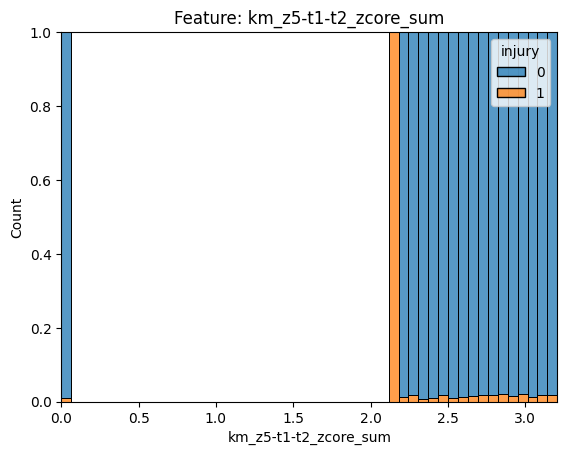

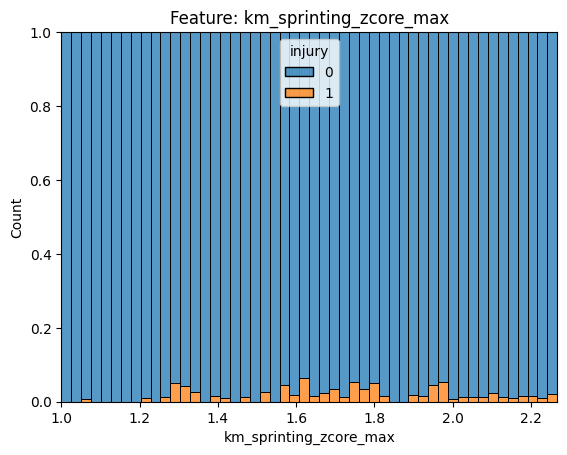

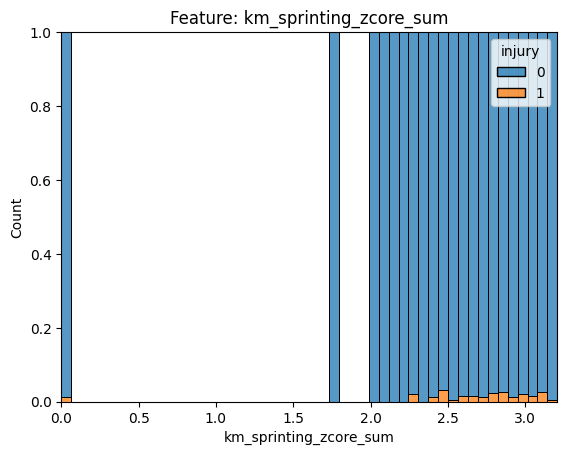

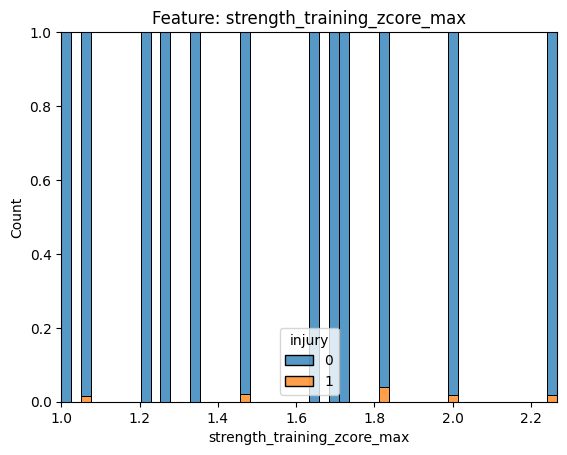

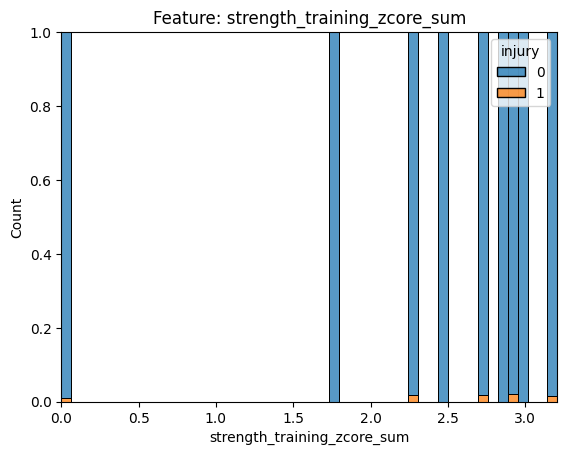

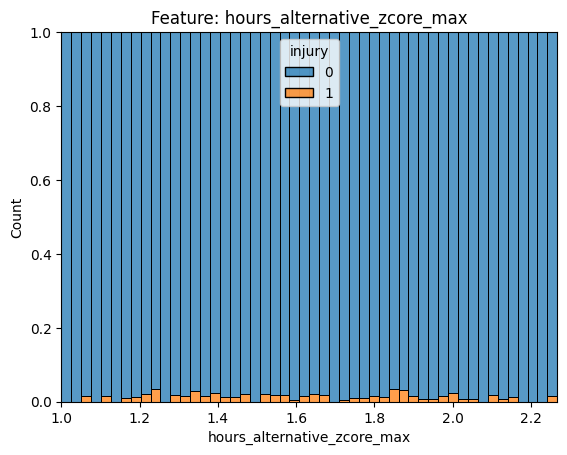

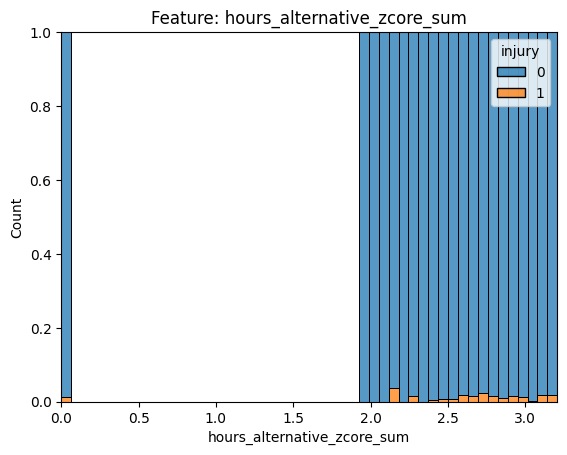

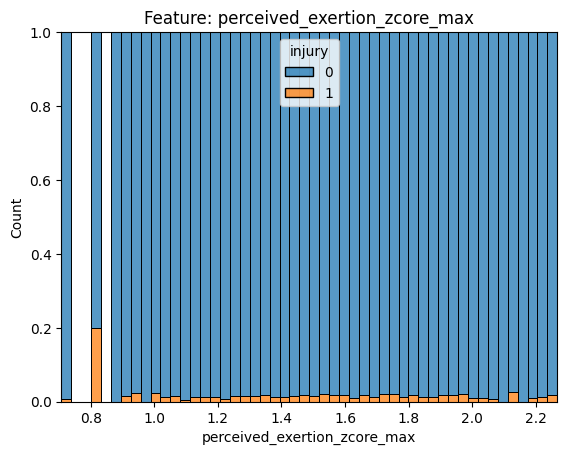

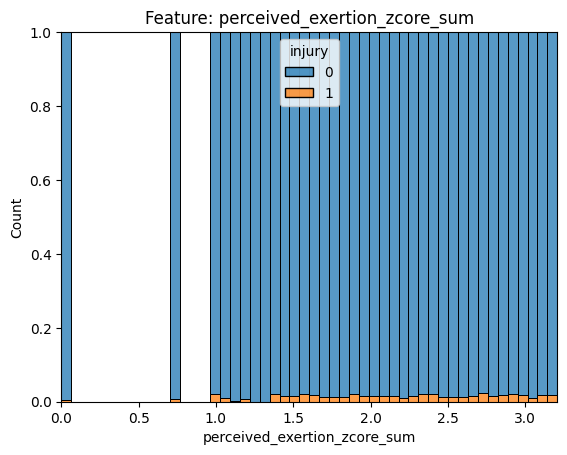

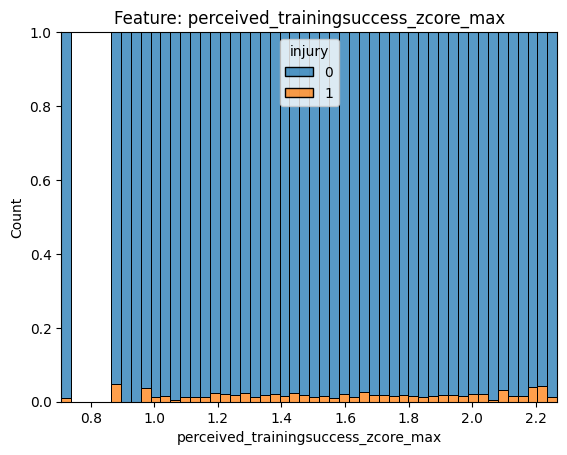

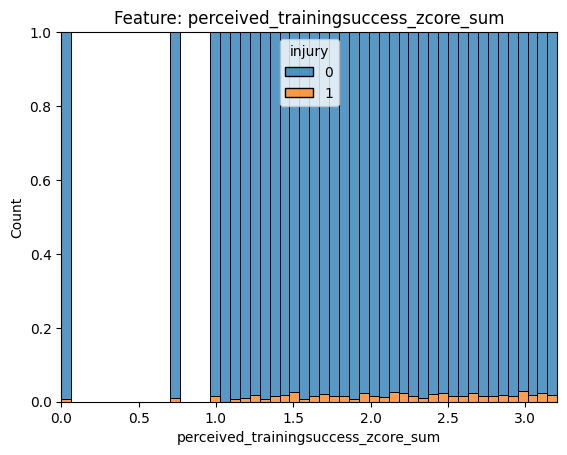

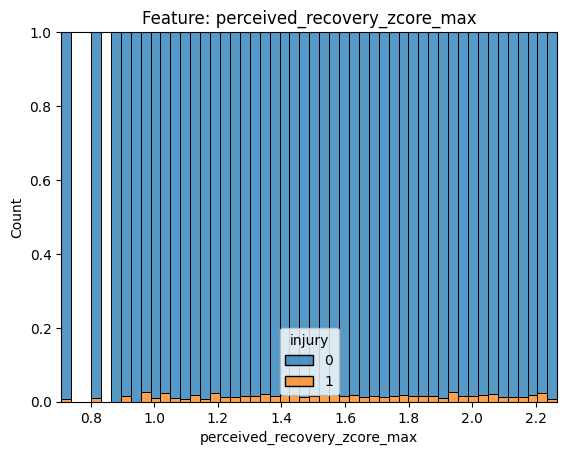

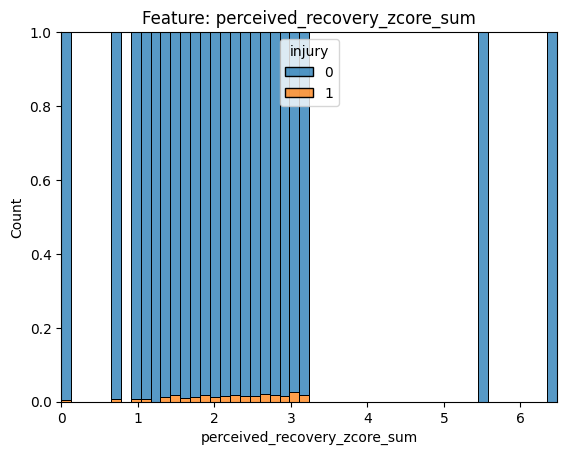

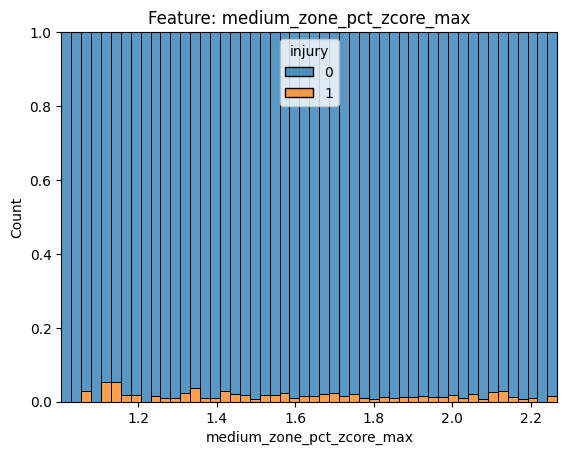

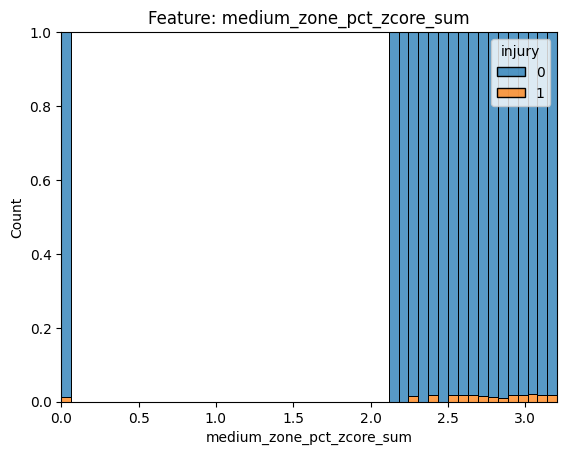

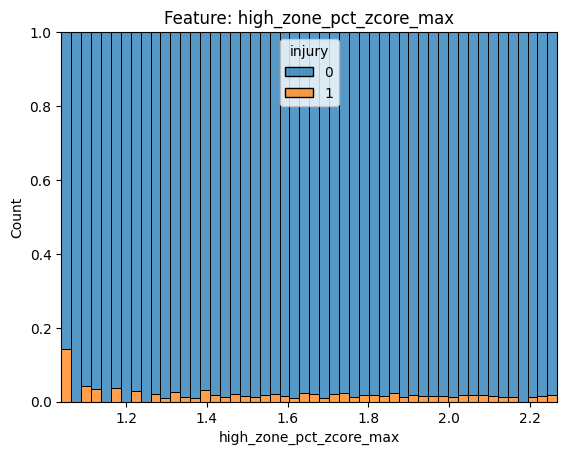

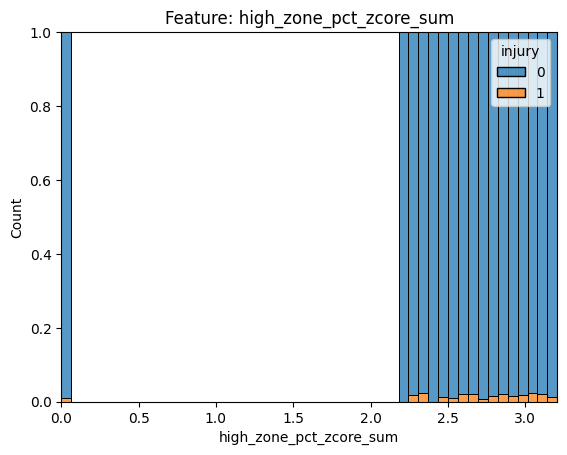

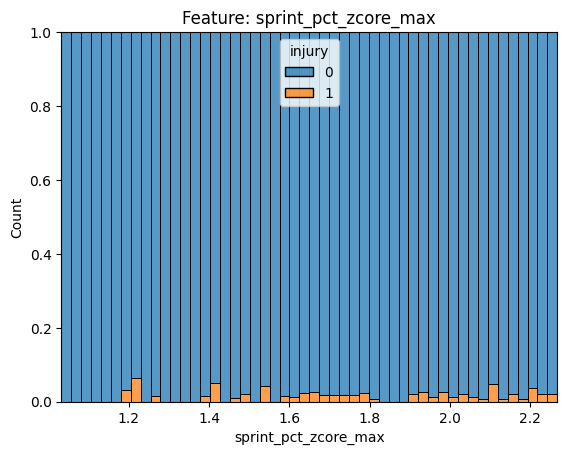

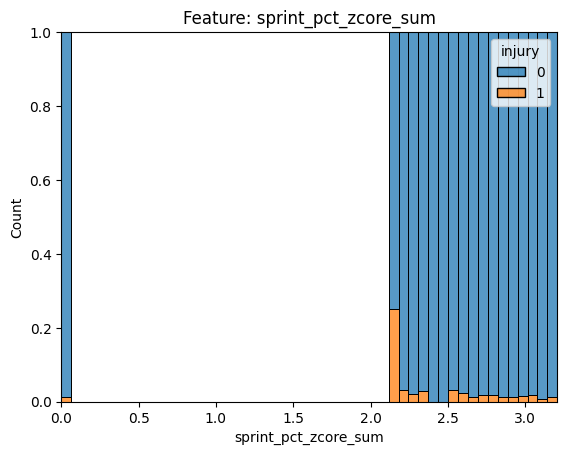

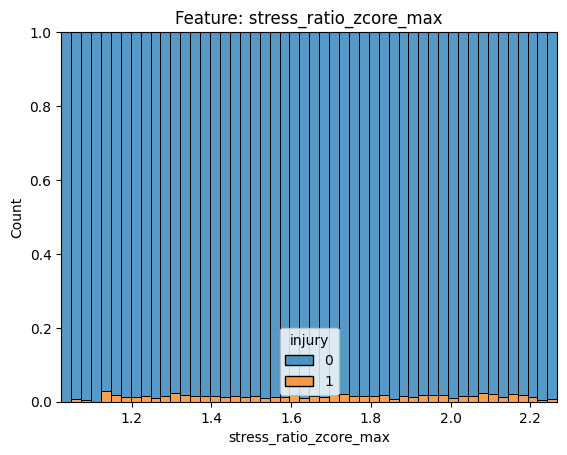

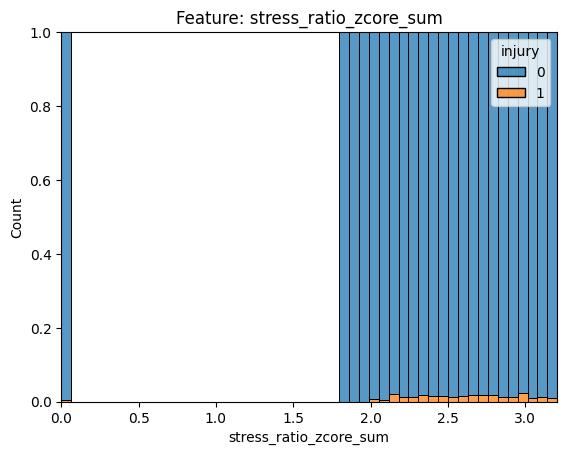

In [38]:

for f in features3:
#     fig, axes = plt.subplots(1, 2, figsize=(18, 5))
#     sns.histplot(df,x=f, hue='injury',stat='percent',ax=axes[0])
#     axes[0].set_title(f"Feature: {f}")
    ax= sns.histplot(data=df, x=f, hue='injury', multiple="fill", element="bars", bins=50)
    ax.set_title(f"Feature: {f}")
    
    plt.show()

In [39]:
df.to_csv('data/data_FE.csv', index=False)

In [40]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 256 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    nr._sessions.0                       float64
 1    total_km.0                           float64
 2    km_z3-4.0                            float64
 3    km_z5-t1-t2.0                        float64
 4    km_sprinting.0                       float64
 5    strength_training.0                  float64
 6    hours_alternative.0                  float64
 7    perceived_exertion.0                 float64
 8    perceived_trainingsuccess.0          float64
 9    perceived_recovery.0                 float64
 10   nr._sessions.1                       float64
 11   total_km.1                           float64
 12   km_z3-4.1                            float64
 13   km_z5-t1-t2.1                        float64
 14   km_sprinting.1                       float64
 15   strength_training